In [35]:
from ExperimentalDesign.TestDesigns import *
from DeepKoopman.Archs import *
import matplotlib.pyplot as plt

In [21]:
def qlplot(mean_ED_MSE, var_ED_MSE, mean_NOED_MSE, var_NOED_MSE, title=None, y_label=None, dpi=100):
    
    plt.style.use('seaborn-v0_8-paper')
    plt.figure(figsize=(10, 5), dpi=dpi)
    
    plt.plot(range(1, len(mean_ED_MSE)+1),jnp.log(mean_ED_MSE), '-o', label = "Optimal")
    plt.plot(range(1, len(mean_ED_MSE)+1),jnp.log(mean_NOED_MSE), '-o', label = "Equidistant")
    
    plt.fill_between(range(1, len(mean_ED_MSE)+1), jnp.log(mean_ED_MSE - var_ED_MSE), jnp.log(mean_ED_MSE + var_ED_MSE), alpha=0.3)
    plt.fill_between(range(1, len(mean_NOED_MSE)+1), jnp.log(mean_NOED_MSE - var_NOED_MSE), jnp.log(mean_NOED_MSE + var_NOED_MSE), alpha=0.3)
    
    plt.title(f'{title}') if title is not None else plt.title(None)
    plt.ylabel(f'{y_label}') if y_label is not None else plt.title(None)
    plt.xlabel('Number of design points')
    plt.xticks(range(1, len(mean_ED_MSE)+1, 2))

    plt.legend()
    plt.show()

def qplot(mean_ED_MSE, var_ED_MSE, mean_NOED_MSE, var_NOED_MSE, title=None, y_label=None, dpi= 100):
    
    plt.style.use('default')
    plt.figure(figsize=(7, 5), dpi=dpi)
    
    plt.plot(range(1, len(mean_ED_MSE)+1), mean_ED_MSE, '-o', label = "Bayesian")
    plt.plot(range(1, len(mean_ED_MSE)+1), mean_NOED_MSE, '-o', label = "Random", color='green')
    
    plt.fill_between(range(1, len(mean_ED_MSE)+1), mean_ED_MSE - var_ED_MSE, mean_ED_MSE + var_ED_MSE, alpha=0.3)
    plt.fill_between(range(1, len(mean_NOED_MSE)+1), mean_NOED_MSE - var_NOED_MSE, mean_NOED_MSE + var_NOED_MSE, alpha=0.3, color='green')
    
    plt.title(f'{title}', fontsize=14) if title is not None else plt.title(None)
    plt.ylabel(f'{y_label}', fontsize=14) if y_label is not None else plt.title(None)
    # plt.xticks
    plt.xticks(range(1, len(mean_ED_MSE)+1, 2), fontsize=12)
    plt.yticks(fontsize=14)
    plt.xlabel('Number of design points', fontsize=14)
    
    plt.legend(frameon=False)
    plt.show()

In [22]:
def plot_results(MLE_reshaped, true_args, labels=None, title='MLE Results Comparison', point_format=['-', '-', '-', '-']):
    """
    Plots the mean and standard deviation of the difference between MLE_reshaped and true_args with customizable options.

    :param MLE_reshaped: The reshaped MLE results.
    :param true_args: The true argument values to compare against.
    :param labels: A list of labels for the plot lines. If None, default labels are used.
    :param title: Title of the plot.
    :param point_format: Format string for the plot points.
    """
    
    true_args_tile = jnp.tile(true_args, (*MLE_reshaped.shape[:-1], 1))
    self_dif = jnp.linalg.norm(MLE_reshaped - true_args_tile, axis=-1)
    self_dif_mean = jnp.mean(self_dif, axis=1)
    self_dif_std = jnp.std(self_dif, axis=1)

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) #if MLE_reshaped.shape[2] > 2 else plt.subplots(figsize=(12, 6))

    # Plotting for the first subplot
    for i, (traj, var) in enumerate(zip(self_dif_mean.T, self_dif_std.T)):
        if i <= 1:  # Adjust the condition as needed
            label = labels[i] if labels and len(labels) > i else f'Var {i+1}'
            ax1.plot(traj, point_format[i], label=label)
            ax1.fill_between(range(len(traj)), traj - var, traj + var, alpha=0.3)

    ax1.set_xlabel('Number of deisgn points')
    ax1.set_ylabel(r"$ ||\gamma - \hat{\gamma}||^2_2 $")
    ax1.set_title(title)
    ax1.legend()
    # ax1.set_yscale('log')  # Set y-axis to logarithmic scale
    
    # Plotting for the second subplot
    for i, (traj, var) in enumerate(zip(self_dif_mean.T, self_dif_std.T)):
        if i > 1:  # Adjust the condition as needed
            label = labels[i] if labels and len(labels) > i else f'Var {i+1}'
            ax2.plot(traj, point_format[i], label=label)
            ax2.fill_between(range(len(traj)), traj - var, traj + var, alpha=0.3)

    ax2.set_xlabel('Number of deisgn points')
    ax2.set_ylabel(r"$ ||\gamma - \hat{\gamma}||^2_2 $")
    ax2.set_title(title)
    ax2.legend()
    # ax2.set_yscale('log')  # Set y-axis to logarithmic scale
    
    return plt

In [23]:
def get_dif_mean(MLE, true_args):
    """
    Returns the ||\\gamma \\hat{\\gamma}||^2_2 of the results.

    :param MLE: The MLE results.
    :return: The mean of the MLE results.
    """
    return jnp.mean(jnp.linalg.norm(MLE-true_args, axis=-1), 0)

def get_dif_std(MLE, true_args):
    """
    Returns the standard deviation of ||\\gamma \\hat{\\gamma}||^2_2.

    :param MLE: The MLE results.
    :return: The standard deviation of the MLE results.
    """
    return jnp.std(jnp.mean(jnp.linalg.norm(MLE-true_args, axis=-1), axis= -2), axis=0)

## MSE study S1

In [14]:
model = load('/Users/antanas/GitRepo/NODE/Models/S1_0118/S1_3D.eqx', 'DynamicKoopman')

02/13

In [90]:
# Low noise: sigma = 1 / params [-0.3, -2.0]
ED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/S1_0213/S1_MLEs_noise_1.pkl")[1:]
NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/S1_0213/S1_MLEs_NOED_noise_1.pkl")[1:]

true_param = jnp.array([-0.3, -2.0])
true_x0 = jnp.array([5.0, 0.0])
ti = jnp.linspace(0, 10, 1000)

In [1103]:
# High noise: sigma = 2 / params [-0.3, -2.0]
ED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/S1_0213/S1_MLEs_noise_2.pkl")[1:]
NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/S1_0213/S1_MLEs_NOED_noise_2.pkl")[1:]

true_param = jnp.array([-0.3, -2.0])
true_x0 = jnp.array([5.0, 0.0])
ti = jnp.linspace(0, 10, 1000)

In [29]:
# High noise: sigma = 2 / params [-0.3, -2.0]
ED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/S1_0213_MLE_100/s1_v2_ED.pkl")[1:]
NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/S1_0213_MLE_100/s1_v2_NOED.pkl")[1:]

true_param = jnp.array([-0.3, -2.0])
true_x0 = jnp.array([5.0, 0.0])
ti = jnp.linspace(0, 10, 1000)

In [30]:
ED_MLEs_ic = ED_MLEs[:, :, 0, :]
NOED_MLEs_ic = NOED_MLEs[:, :, 0, :]

true_traj = solve(ti, true_x0, true_param, s1_vfield)

solve_map = jax.vmap(lambda u: solve(ti, true_x0, u, s1_vfield), in_axes=[0])
pred_trajs = jax.vmap(solve_map, in_axes=[0])(ED_MLEs_ic)
NOED_pred_trajs = jax.vmap(solve_map)(NOED_MLEs_ic)

In [31]:
NOED_MSE = jnp.linalg.norm(NOED_pred_trajs - true_traj, axis=-1)**2


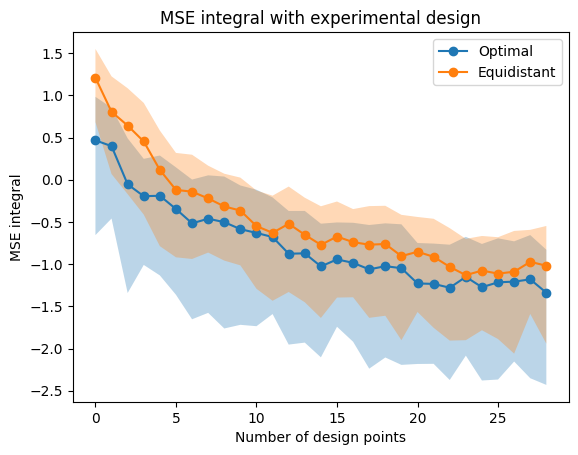

In [32]:
NOED_MSE = jnp.linalg.norm(NOED_pred_trajs - true_traj, axis=-1)
NOED_MSE_ = jnp.mean(NOED_MSE, axis=-1)
mean_NOED_MSE = jnp.mean(NOED_MSE_, axis=-1)
var_NOED_MSE = jnp.std(NOED_MSE_, axis=-1)#/jnp.sqrt(NOED_MLEs_ic.shape[1])

# random_NOED_MSE = jnp.linalg.norm(random_NOED_pred_trajs - true_traj, axis=-1)
# random_NOED_MSE_ = jnp.mean(random_NOED_MSE, axis=-1)
# mean_random_NOED_MSE = jnp.mean(random_NOED_MSE_, axis=-1)
# var_random_NOED_MSE = jnp.std(random_NOED_MSE_, axis=-1)#/jnp.sqrt(random_NOED_MLEs_ic.shape[1])

MSE = jnp.linalg.norm(pred_trajs - true_traj, axis=-1)
MSE_ = jnp.mean(MSE, axis=-1)  
mean_ED_MSE = jnp.mean(MSE_, axis=-1)
var_ED_MSE = jnp.std(MSE_, axis=-1)#/jnp.sqrt(ED_MLEs_ic.shape[1])


plt.plot(jnp.log(mean_ED_MSE), '-o', label = "Optimal")
plt.plot(jnp.log(mean_NOED_MSE), '-o', label = "Equidistant")
# plt.plot(jnp.log(mean_random_NOED_MSE), '-o', label = "Random")

plt.fill_between(range(len(mean_ED_MSE)), jnp.log(mean_ED_MSE - var_ED_MSE), jnp.log(mean_ED_MSE + var_ED_MSE), alpha=0.3)
plt.fill_between(range(len(mean_NOED_MSE)), jnp.log(mean_NOED_MSE - var_NOED_MSE), jnp.log(mean_NOED_MSE + var_NOED_MSE), alpha=0.3)
# plt.fill_between(range(len(mean_random_NOED_MSE)), jnp.log(mean_random_NOED_MSE - var_random_NOED_MSE), jnp.log(mean_random_NOED_MSE + var_random_NOED_MSE), alpha=0.3)

plt.title('MSE integral with experimental design')
plt.xlabel('Number of design points')
plt.ylabel('MSE integral')
plt.legend()
plt.show()


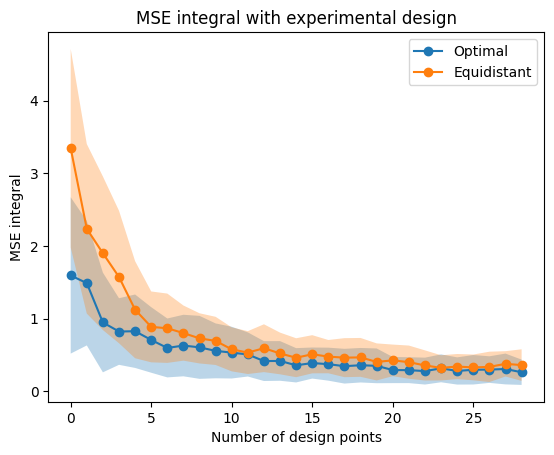

In [33]:
NOED_MSE = jnp.linalg.norm(NOED_pred_trajs - true_traj, axis=-1)
NOED_MSE_ = jnp.mean(NOED_MSE, axis=-1)
mean_NOED_MSE = jnp.mean(NOED_MSE_, axis=-1)
var_NOED_MSE = jnp.std(NOED_MSE_, axis=-1)#/jnp.sqrt(NOED_MLEs_ic.shape[1])

# random_NOED_MSE = jnp.linalg.norm(random_NOED_pred_trajs - true_traj, axis=-1)
# random_NOED_MSE_ = jnp.mean(random_NOED_MSE, axis=-1)
# mean_random_NOED_MSE = jnp.mean(random_NOED_MSE_, axis=-1)
# var_random_NOED_MSE = jnp.std(random_NOED_MSE_, axis=-1)#/jnp.sqrt(random_NOED_MLEs_ic.shape[1])

MSE = jnp.linalg.norm(pred_trajs - true_traj, axis=-1)
MSE_ = jnp.mean(MSE, axis=-1)  
mean_ED_MSE = jnp.mean(MSE_, axis=-1)
var_ED_MSE = jnp.std(MSE_, axis=-1)#/jnp.sqrt(ED_MLEs_ic.shape[1])


plt.plot(mean_ED_MSE, '-o', label = "Optimal")
plt.plot(mean_NOED_MSE, '-o', label = "Equidistant")
# plt.plot(mean_random_NOED_MSE, '-o', label = "Random")

plt.fill_between(range(len(mean_ED_MSE)), mean_ED_MSE - var_ED_MSE, mean_ED_MSE + var_ED_MSE, alpha=0.3)
plt.fill_between(range(len(mean_NOED_MSE)), mean_NOED_MSE - var_NOED_MSE, mean_NOED_MSE + var_NOED_MSE, alpha=0.3)
# plt.fill_between(range(len(mean_random_NOED_MSE)), mean_random_NOED_MSE - var_random_NOED_MSE, mean_random_NOED_MSE + var_random_NOED_MSE, alpha=0.3)

plt.title('MSE integral with experimental design')
plt.xlabel('Number of design points')
plt.ylabel('MSE integral')
plt.legend()
plt.show()


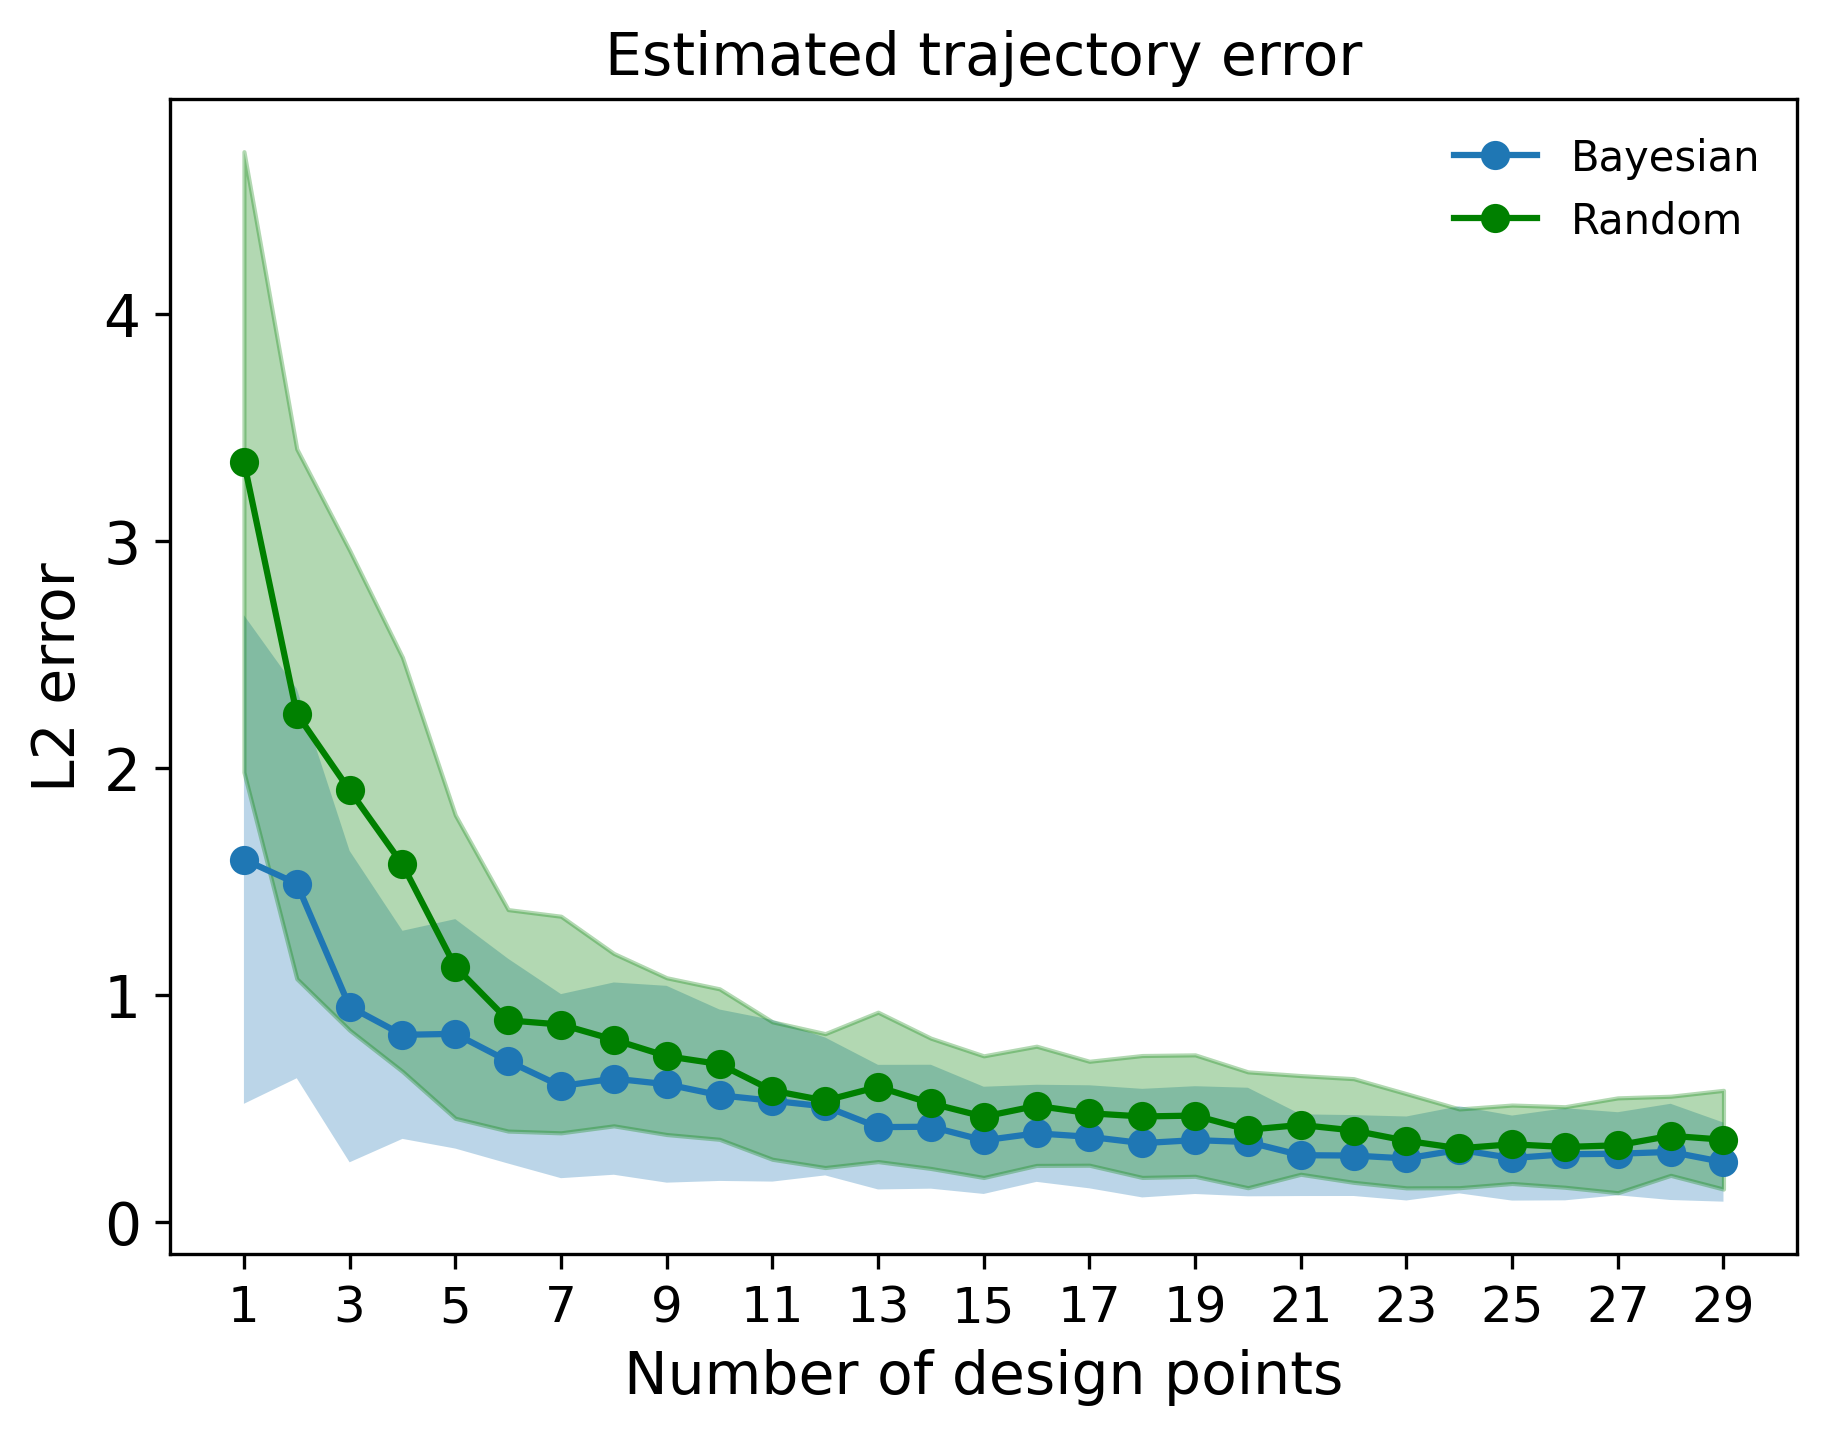

In [34]:
NOED_MSE = jnp.linalg.norm(NOED_pred_trajs - true_traj, axis=-1) #/ jnp.linalg.norm(true_traj, axis=-1)**2
NOED_MSE_ = jnp.mean(NOED_MSE, axis=-1)
mean_NOED_MSE = jnp.mean(NOED_MSE_, axis=-1)
var_NOED_MSE = jnp.std(NOED_MSE_, axis=-1)
# min_mean_NOED_MSE = jnp.min(NOED_MSE_, axis=-1)
# max_mean_NOED_MSE = jnp.max(NOED_MSE_, axis=-1)

MSE = jnp.linalg.norm(pred_trajs - true_traj, axis=-1) #/ jnp.linalg.norm(true_traj, axis=-1)**2
MSE_ = jnp.mean(MSE, axis=-1)  
mean_ED_MSE = jnp.mean(MSE_, axis=-1)
var_ED_MSE = jnp.std(MSE_, axis=-1) 


# min_mean_ED_MSE = jnp.min(MSE_, axis=-1)
# max_mean_ED_MSE = jnp.max(MSE_, axis=-1)

# plt.figure(figsize=(8, 6), dpi=100)
# plt.plot(mean_ED_MSE, '-o', label = "Optimal")
# plt.plot(mean_NOED_MSE, '-o', label = "Equidistant")
# plt.fill_between(range(len(mean_ED_MSE)), mean_ED_MSE - var_ED_MSE, mean_ED_MSE + var_ED_MSE, alpha=0.3)
# plt.fill_between(range(len(mean_NOED_MSE)), mean_NOED_MSE - var_NOED_MSE, mean_NOED_MSE + var_NOED_MSE, alpha=0.3)
# # plt.fill_between(range(len(mean_ED_MSE)), jnp.log(min_mean_ED_MSE), jnp.log(max_mean_ED_MSE), alpha=0.3)
# # plt.fill_between(range(len(mean_NOED_MSE)), jnp.log(min_mean_NOED_MSE), jnp.log(max_mean_NOED_MSE), alpha=0.3)
# # plt.title('')
# #plt.yscale('log')
# # plt.ylim(-10, 10)
# plt.title('Estimated trajectory error')
# plt.xlabel('Number of design points')
# plt.ylabel('L2 error')
# plt.xticks(range(1, len(mean_ED_MSE)+1))
# # plt.legend()
# plt.show()

qplot(mean_ED_MSE, var_ED_MSE, mean_NOED_MSE, var_NOED_MSE, title='Estimated trajectory error', y_label='L2 error', dpi=300)

In [1120]:
Means = jax.vmap(lambda x, y: get_dif_mean(x, y), in_axes = [0, None])(ED_MLEs, true_param)
mu = jnp.mean(Means, axis=1)
var = jax.vmap(get_dif_std, in_axes = [0, None])(ED_MLEs, true_param)#/jnp.sqrt(ED_MLEs.shape[-2])

NOED_Means = jax.vmap(lambda x, y: get_dif_mean(x, y), in_axes = [0, None])(NOED_MLEs, true_param)
NOED_mu = jnp.mean(NOED_Means, axis=1)
NOED_var = jax.vmap(get_dif_std, in_axes = [0, None])(NOED_MLEs,true_param)#/jnp.sqrt(NOED_MLEs.shape[-2])

In [1121]:
mu = jnp.mean(jnp.linalg.norm(ED_MLEs_ic - true_param, axis=-1), axis=[1])    
NOED_mu = jnp.mean(jnp.linalg.norm(NOED_MLEs_ic - true_param, axis=-1), axis=[1])

var = jnp.std(jnp.linalg.norm(ED_MLEs_ic - true_param, axis=-1), axis=[1])#/jnp.sqrt(ED_MLEs_ic.shape[1])
NOED_var = jnp.std(jnp.linalg.norm(NOED_MLEs_ic - true_param, axis=-1), axis=[1])#/jnp.sqrt(NOED_MLEs_ic.shape[1])

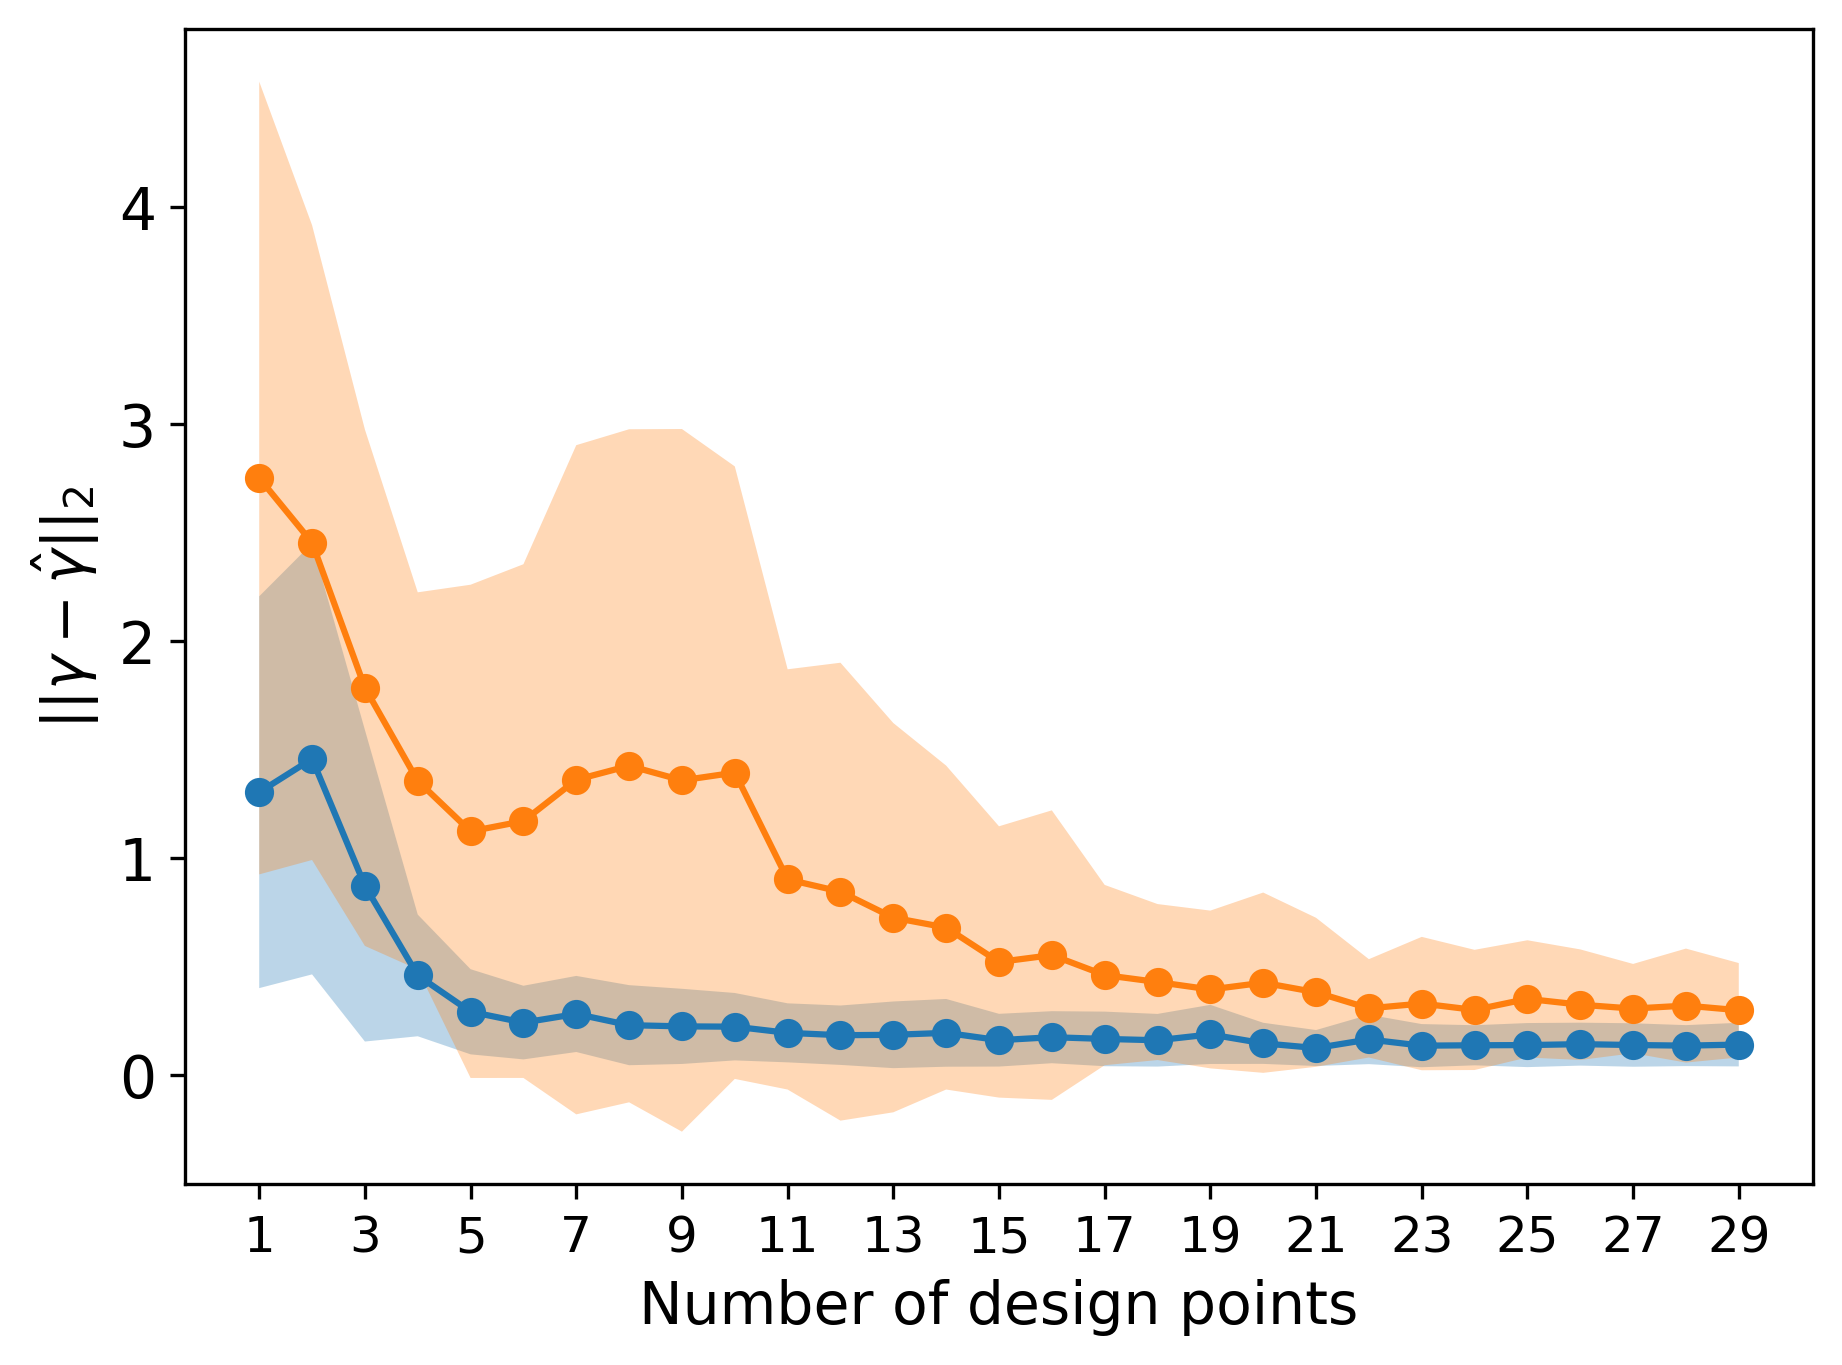

In [1125]:
qplot(mu, var, NOED_mu, NOED_var, y_label=r'$||\gamma - \hat{\gamma}||_2$', dpi=300)

In [484]:
def add_axis(array):
    return array.reshape(1, *array.shape)

MSE in latent space

Text(0, 0.5, 'L2 error norm')

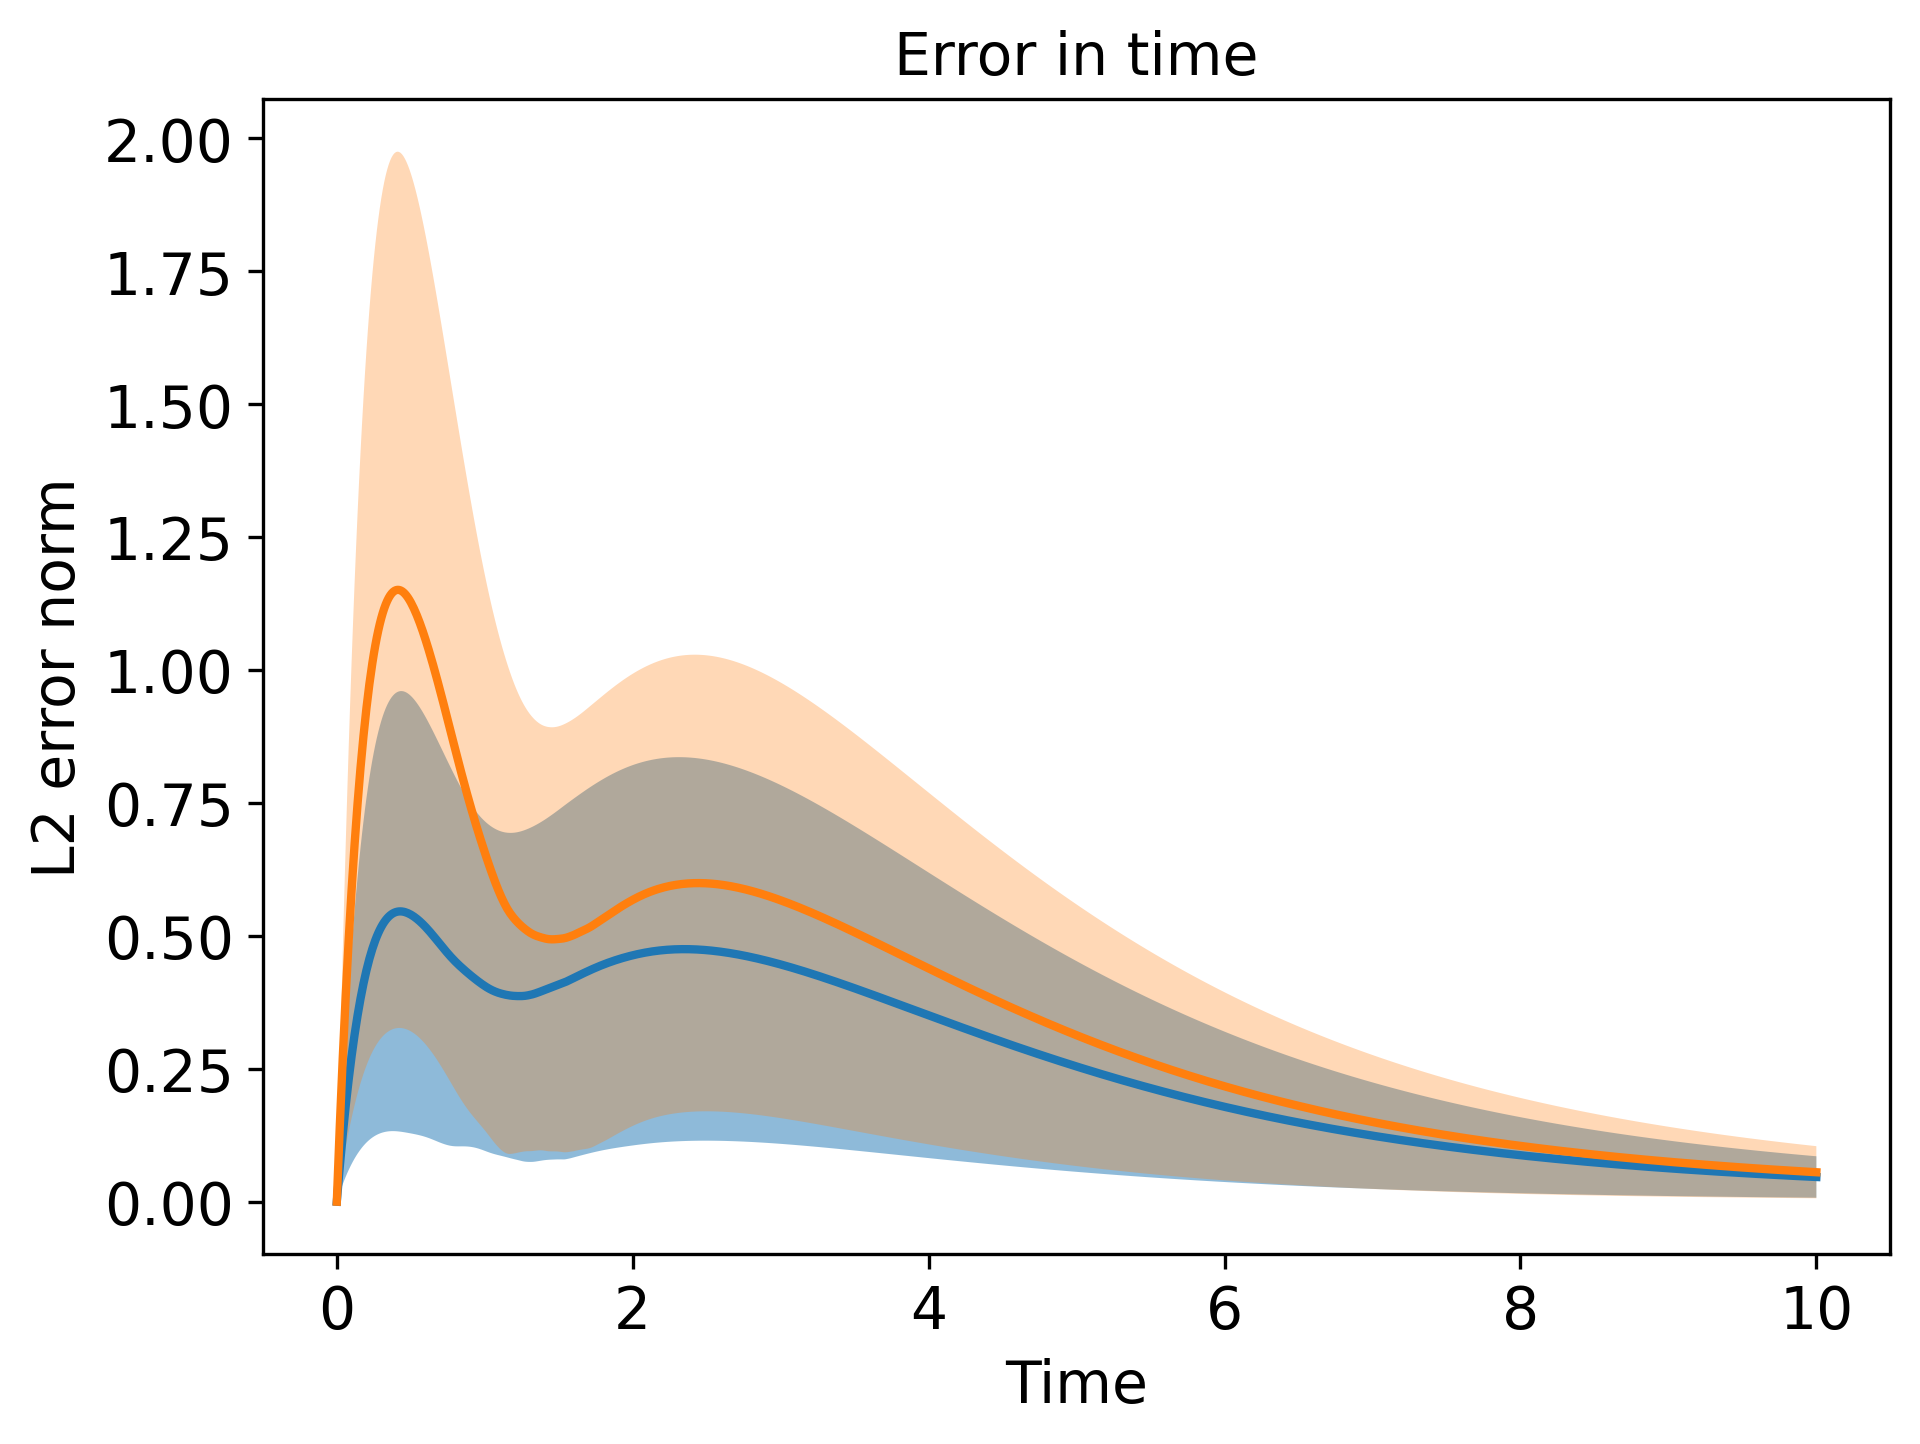

In [1129]:
NOED_MLE_across_time = jnp.linalg.norm(NOED_pred_trajs - true_traj, axis=-1)[-1]#[-1]
NOED_MLE_across_time = add_axis(NOED_MLE_across_time)

MLE_across_time = jnp.linalg.norm(pred_trajs - true_traj, axis=-1)[-1]#[-1]
MLE_across_time = add_axis(MLE_across_time)

NOED_MLE_across_time_mean = jnp.mean(NOED_MLE_across_time, axis=[0, 1])
var_NOED_MSE = jnp.std(NOED_MLE_across_time, axis=[0,1])

MLE_across_time_mean = jnp.mean(MLE_across_time, axis=[0, 1])
var_ED_MSE = jnp.std(MLE_across_time, axis=[0,1])

plt.figure(figsize=(7, 5), dpi=300)

plt.plot(ti, MLE_across_time_mean, linewidth = 2,label = "Optimal")
plt.fill_between(ti, MLE_across_time_mean - var_ED_MSE, MLE_across_time_mean + var_ED_MSE, alpha=0.5)
# plt.plot(ti, MLE_across_time_mean - var_ED_MSE, linewidth=1)
# plt.plot(ti, MLE_across_time_mean + var_ED_MSE, linewidth=1)

plt.plot(ti, NOED_MLE_across_time_mean, linewidth=2, label = "Equidistant")
# plt.plot(ti, NOED_MLE_across_time_mean - var_NOED_MSE, linewidth = 1, linestyle = "-")
# plt.plot(ti, NOED_MLE_across_time_mean + var_NOED_MSE, linewidth = 1, linestyle = "-")
plt.fill_between(ti, NOED_MLE_across_time_mean - var_NOED_MSE, NOED_MLE_across_time_mean + var_NOED_MSE, alpha=0.3)


# plt.legend(frameon=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Error in time', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.ylabel('L2 error norm', fontsize=14)

### Latent space

In [470]:
ti = jnp.linspace(0, 10, 100)
map1 = jax.vmap(lambda x: model(ti, true_x0, x))
# map2 = jax.vmap(map1)
# map3 = jax.vmap(map2)
_, _, pred_latent_trajs = jax.vmap(map1)(ED_MLEs_ic)
_, _, NOED_pred_latent_trajs = jax.vmap(map1)(NOED_MLEs_ic)
_, _, true_latent_traj = model(ti, true_x0, true_param)

In [10]:
# Loop over the MLEs and solve the model for each set of parameters
pred_latent_trajs = []
NOED_pred_latent_trajs = []
for i, l in zip(pred_trajs, NOED_pred_trajs):
    for m, o in zip(i, l):
        for j, k in zip(ED_MLEs_ic, NOED_MLEs_ic):
            for ED_p, NOED_p in zip(k, j):
                latent_traj = jax.vmap(model.get_latent, in_axes =[0,None])(m, ED_p)
                pred_latent_trajs.append(latent_traj)
                NOED_latent_traj = jax.vmap(model.get_latent, in_axes =[0,None])(o, ED_p)
                NOED_pred_latent_trajs.append(NOED_latent_traj)

KeyboardInterrupt: 

In [1130]:
ED_norm = jnp.linalg.norm(pred_latent_trajs - true_latent_traj, axis=-1)
ED_sum = jnp.mean(ED_norm, axis=-1)
ED_mean = jnp.mean(ED_sum, axis=-1)
ED_var = jnp.std(ED_sum, axis=-1)#/jnp.sqrt(ED_sum.shape[-2])

In [1131]:
NOED_norm = jnp.linalg.norm(NOED_pred_latent_trajs - true_latent_traj, axis=-1)
NOED_sum = jnp.mean(NOED_norm, axis=-1)
NOED_mean = jnp.mean(NOED_sum, axis=-1) 
NOED_var = jnp.std(NOED_sum, axis=-1)#/jnp.sqrt(NOED_sum.shape[-2])


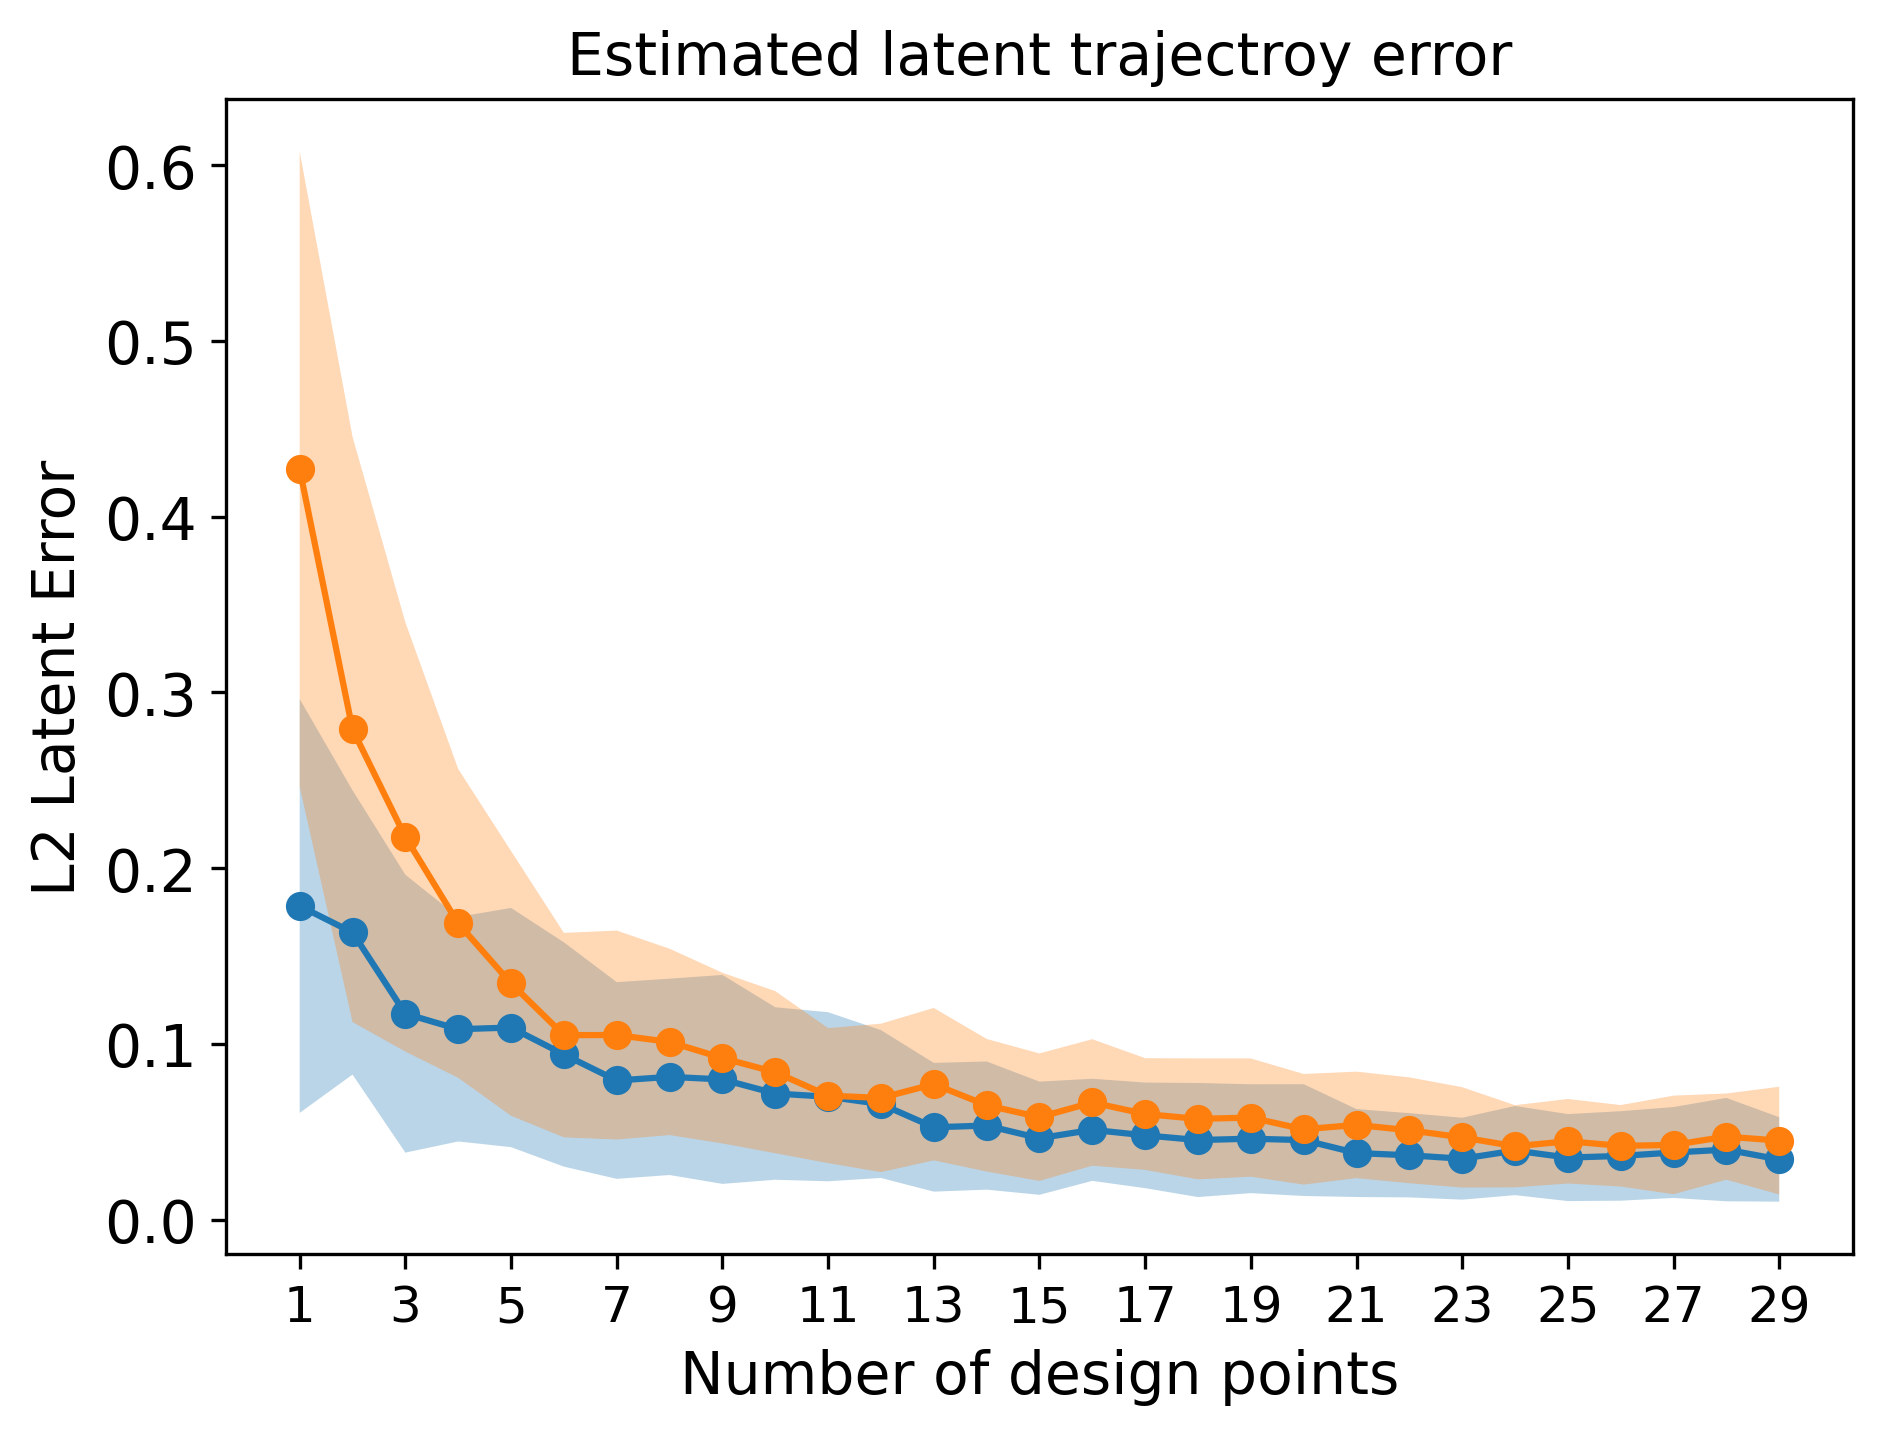

In [1132]:
qplot(ED_mean, ED_var, NOED_mean, NOED_var, y_label=rf'L2 Latent Error', title='Estimated latent trajectroy error', dpi=300)

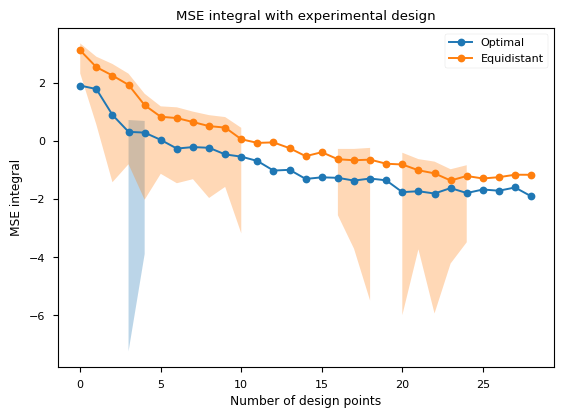

In [95]:
NOED_MSE = jnp.linalg.norm(NOED_pred_trajs - true_traj, axis=-1)**2
NOED_MSE_ = jnp.mean(NOED_MSE, axis=-1)
mean_NOED_MSE = jnp.mean(NOED_MSE_, axis=-1)
var_NOED_MSE = jnp.std(NOED_MSE_, axis=-1)#/jnp.sqrt(NOED_MSE_.shape[-2])

MSE = jnp.linalg.norm(pred_trajs - true_traj, axis=-1)**2
MSE_ = jnp.mean(MSE, axis=-1)  
mean_ED_MSE = jnp.mean(MSE_, axis=-1)
var_ED_MSE = jnp.std(MSE_, axis=-1)#/jnp.sqrt(MSE_.shape[-2])

plt.plot(jnp.log(mean_ED_MSE), '-o', label = "Optimal")
plt.plot(jnp.log(mean_NOED_MSE), '-o', label = "Equidistant")
plt.fill_between(range(len(mean_ED_MSE)), jnp.log(mean_ED_MSE - var_ED_MSE), jnp.log(mean_ED_MSE + 0.5*var_ED_MSE), alpha=0.3)
plt.fill_between(range(len(mean_NOED_MSE)), jnp.log(mean_NOED_MSE - var_NOED_MSE), jnp.log(mean_NOED_MSE + 0.5*var_NOED_MSE), alpha=0.3)
plt.title('MSE integral with experimental design')
plt.xlabel('Number of design points')
plt.ylabel('MSE integral')
plt.legend()
plt.show()

Text(0, 0.5, 'Latent L2 error norm')

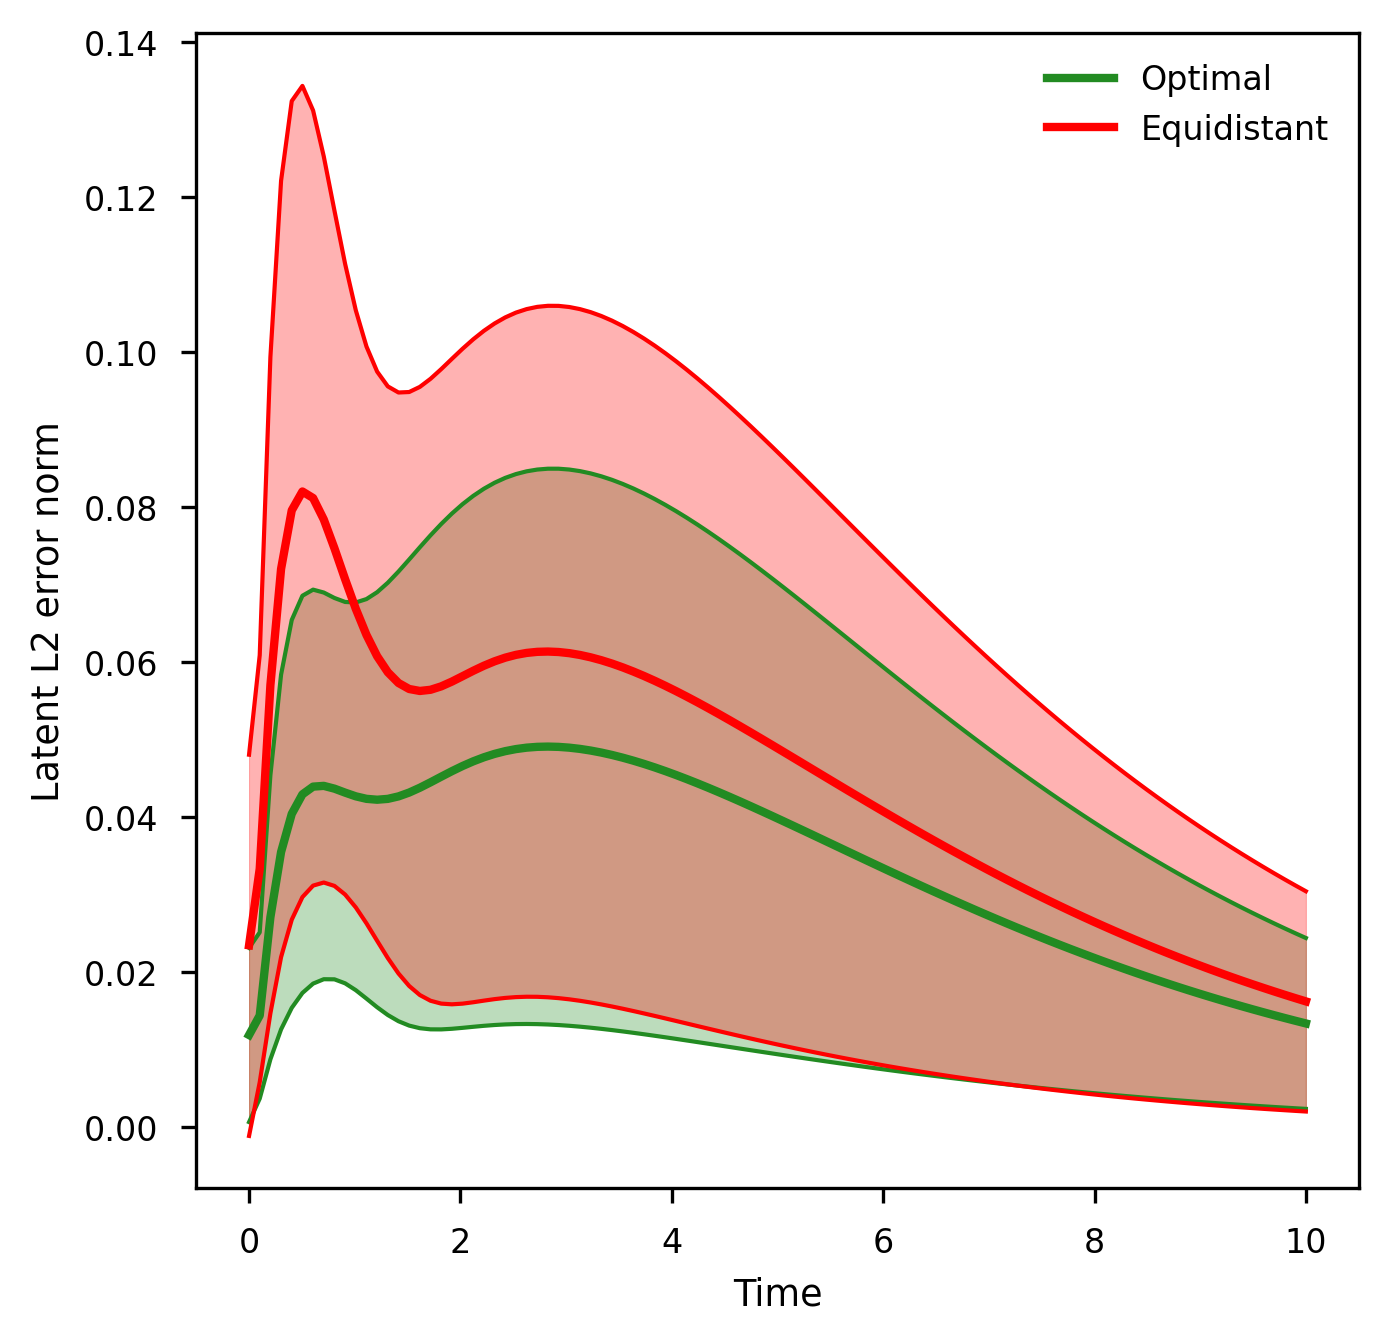

In [68]:
NOED_MLE_across_time = jnp.linalg.norm(NOED_pred_latent_trajs - true_latent_traj, axis=-1)[-1]
NOED_MLE_across_time = add_axis(NOED_MLE_across_time)
var_NOED_MSE = jnp.std(NOED_MLE_across_time, axis=[0,1])

MLE_across_time = jnp.linalg.norm(pred_latent_trajs - true_latent_traj, axis=-1)[-1]
MLE_across_time = add_axis(MLE_across_time)
var_ED_MSE = jnp.std(MLE_across_time, axis=[0,1])

NOED_MLE_across_time_mean = jnp.mean(NOED_MLE_across_time, axis=[0, 1])
MLE_across_time_mean = jnp.mean(MLE_across_time, axis=[0, 1])

plt.figure(figsize=(5, 5), dpi=300)
plt.plot(ti, MLE_across_time_mean, color = "forestgreen", linewidth = 2,label = "Optimal")
plt.fill_between(ti, MLE_across_time_mean - var_ED_MSE, MLE_across_time_mean + var_ED_MSE, color='forestgreen', alpha=0.3)
plt.plot(ti, MLE_across_time_mean - var_ED_MSE, color="forestgreen", linewidth=1)
plt.plot(ti, MLE_across_time_mean + var_ED_MSE, color="forestgreen", linewidth=1)

plt.plot(ti, NOED_MLE_across_time_mean, color="red", linewidth=2, label = "Equidistant")
plt.plot(ti, NOED_MLE_across_time_mean - var_NOED_MSE, color = "red", linewidth = 1, linestyle = "-")
plt.plot(ti, NOED_MLE_across_time_mean + var_NOED_MSE, color = "red", linewidth = 1, linestyle = "-")
plt.fill_between(ti, NOED_MLE_across_time_mean - var_NOED_MSE, NOED_MLE_across_time_mean + var_NOED_MSE, color='red', alpha=0.3)

plt.legend(frameon=False)
plt.xlabel('Time')
plt.ylabel('Latent L2 error norm')

# Oscillator 

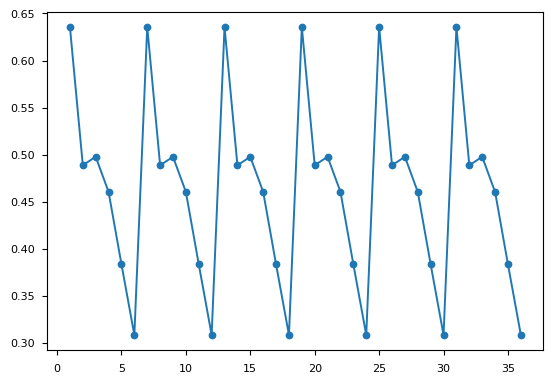

In [121]:
osci_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/Oscillator/MLE_oscilator_IC_performance.pkl")
norm_osci = jnp.linalg.norm(osci_MLEs - jnp.array([-2.0, 1.0]), axis=-1)
mu_osci = jnp.mean(norm_osci, axis=1)   
plt.plot(range(1,len(mu_osci[0])+1), mu_osci[0], '-o', label = "Optimal")

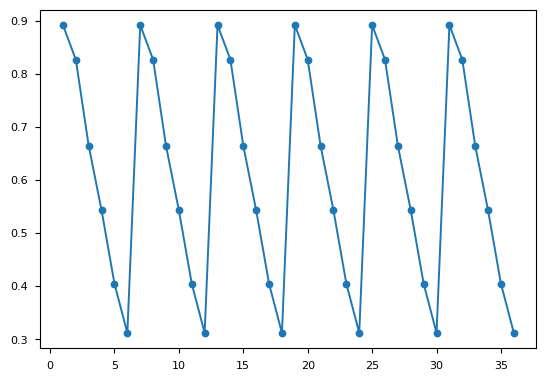

In [122]:
osci_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/Oscillator/MLE_oscilator_IC_performance_noed.pkl")
norm_osci = jnp.linalg.norm(osci_MLEs - jnp.array([-2.0, 1.0]), axis=-1)
mu_osci_noed = jnp.mean(norm_osci, axis=1)   
plt.plot(range(1,len(mu_osci_noed[0])+1), mu_osci_noed[0], '-o', label = "Equidistant")

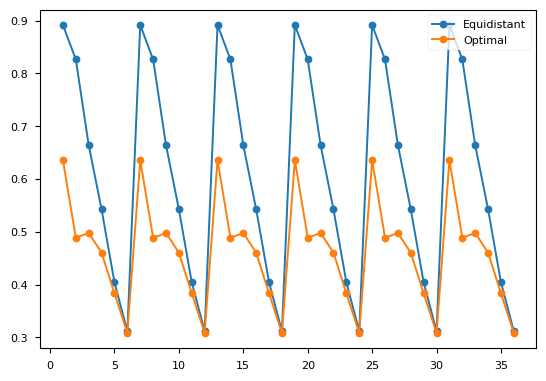

In [123]:
plt.plot(range(1,len(mu_osci_noed[0])+1), mu_osci_noed[0], '-o', label = "Equidistant")
plt.plot(range(1,len(mu_osci[0])+1), mu_osci[0], '-o', label = "Optimal")
plt.legend()

In [96]:
norm_osci.shape

(1, 50, 40)

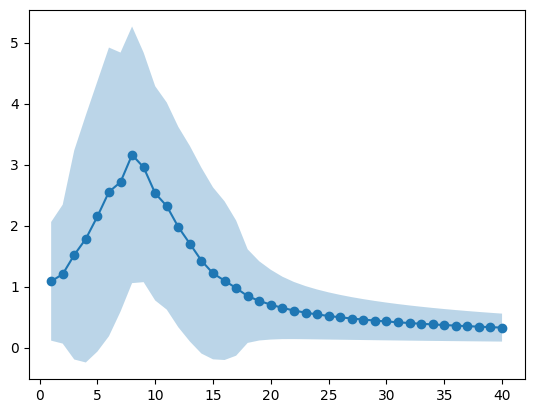

In [114]:
osci_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/Oscillator/MLE_oscilator_IC_performance_simple_start_ed_try3.pkl")
norm_osci = jnp.linalg.norm(osci_MLEs - jnp.array([-2.0, 1.0]), axis=-1)
mu_osci_sdesign = jnp.mean(norm_osci[0], axis=0)  
var_osci_sdesign = jnp.std(norm_osci[0], axis=0) 
plt.plot(range(1,len(mu_osci_sdesign)+1), mu_osci_sdesign, '-o', label = "Optimal")
plt.fill_between(range(1,len(mu_osci_sdesign)+1), mu_osci_sdesign - var_osci_sdesign, mu_osci_sdesign + var_osci_sdesign, alpha=0.3)

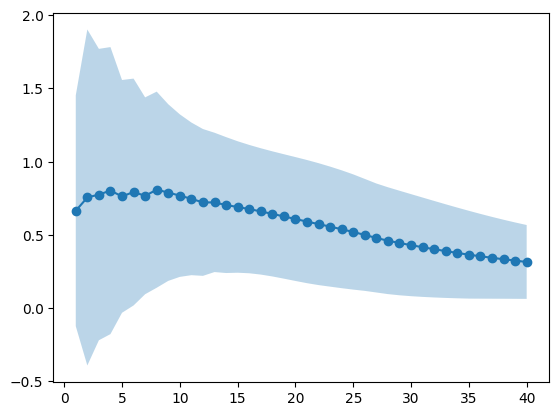

In [115]:
osci_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/Oscillator/MLE_oscilator_IC_performance_ed_try3.pkl")
norm_osci = jnp.linalg.norm(osci_MLEs - jnp.array([-2.0, 1.0]), axis=-1)
mu_osci_ed = jnp.mean(norm_osci[0], axis=0)  
var_osci_ed = jnp.std(norm_osci[0], axis=0) 
plt.plot(range(1,len(mu_osci_ed)+1), mu_osci_ed, '-o', label = "Optimal")
plt.fill_between(range(1,len(mu_osci_ed)+1), mu_osci_ed - var_osci_ed, mu_osci_ed + var_osci_ed, alpha=0.3)



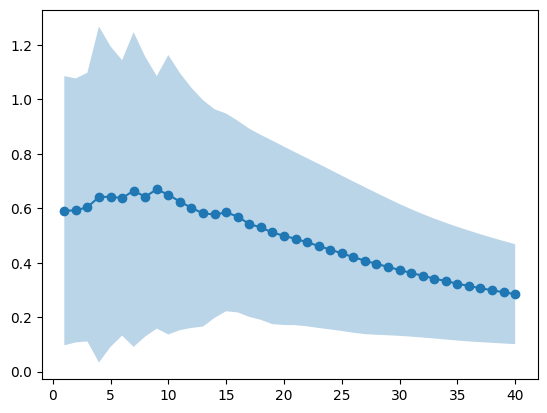

In [116]:
osci_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/Oscillator/MLE_oscilator_IC_performance_noed_try3.pkl")
norm_osci = jnp.linalg.norm(osci_MLEs - jnp.array([-2.0, 1.0]), axis=-1)
mu_osci_eq = jnp.mean(norm_osci[0], axis=0)  
var_osci_eq = jnp.std(norm_osci[0], axis=0) 
plt.plot(range(1,len(mu_osci_eq)+1), mu_osci, '-o', label = "Optimal")
plt.fill_between(range(1,len(mu_osci_eq)+1), mu_osci_eq - var_osci_eq, mu_osci_eq + var_osci_eq, alpha=0.3)



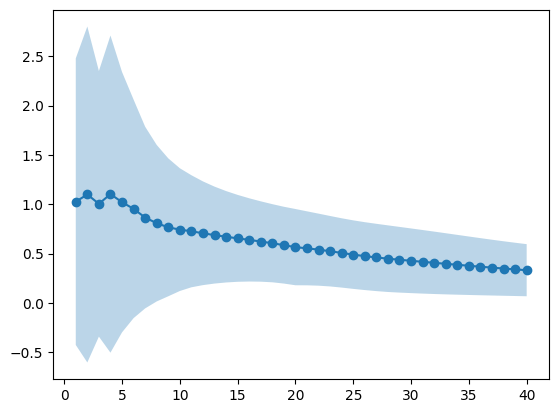

In [118]:
osci_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/Oscillator/MLE_oscilator_IC_performance_first_period_ed_try3.pkl")
norm_osci = jnp.linalg.norm(osci_MLEs - jnp.array([-2.0, 1.0]), axis=-1)
mu_osci_fp = jnp.mean(norm_osci[0], axis=0)  
var_osci_fp = jnp.std(norm_osci[0], axis=0) 
plt.plot(range(1,len(mu_osci_fp)+1), mu_osci_fp, '-o', label = "Optimal")
plt.fill_between(range(1,len(mu_osci_fp)+1), mu_osci_fp - var_osci_fp, mu_osci_fp + var_osci_fp, alpha=0.3)


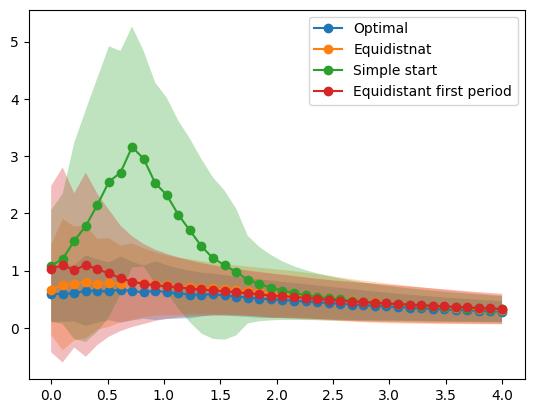

In [180]:
plt.plot(jnp.linspace(0, 4, len(mu_osci_eq)), mu_osci_eq, '-o', label = "Optimal")
plt.fill_between(jnp.linspace(0, 4, len(mu_osci_eq)), mu_osci_eq - var_osci_eq, mu_osci_eq + var_osci_eq, alpha=0.3)

plt.plot(jnp.linspace(0, 4, len(mu_osci_ed)), mu_osci_ed, '-o', label = "Equidistnat")
plt.fill_between(jnp.linspace(0, 4, len(mu_osci_ed)), mu_osci_ed - var_osci_ed, mu_osci_ed + var_osci_ed, alpha=0.3)

plt.plot(jnp.linspace(0, 4, len(mu_osci_sdesign)), mu_osci_sdesign, '-o', label = "Simple start")
plt.fill_between(jnp.linspace(0, 4, len(mu_osci_sdesign)), mu_osci_sdesign - var_osci_sdesign, mu_osci_sdesign + var_osci_sdesign, alpha=0.3)

plt.plot(jnp.linspace(0, 4, len(mu_osci_fp)), mu_osci_fp, '-o', label = "Equidistant first period")
plt.fill_between(jnp.linspace(0, 4, len(mu_osci_fp)), mu_osci_fp - var_osci_fp, mu_osci_fp + var_osci_fp, alpha=0.3)


plt.legend()




# VDP

In [1146]:
ED_MLEs = load_from_file("Results/VDP/MLEs_ED_minimax.pkl")[0:10]
NOED_MLEs = load_from_file("Results/VDP/MLEs_NO_ED_minimax.pkl")[0:10]
random_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/VDP/MLEs_random_design_s1.pkl")[0:10]
ED_MLEs = ED_MLEs.reshape(ED_MLEs.shape[0], ED_MLEs.shape[1], ED_MLEs.shape[-1])
NOED_MLEs = NOED_MLEs.reshape(NOED_MLEs.shape[0], NOED_MLEs.shape[1], NOED_MLEs.shape[-1])
random_MLEs = random_MLEs.reshape(random_MLEs.shape[0], random_MLEs.shape[1], random_MLEs.shape[-1])

true_args = jnp.array([1.5])


In [1145]:
ED_MLEs = load_from_file("Results/VDP/MLEs_ED_minimax_try2_s01.pkl")[1:]
NOED_MLEs = load_from_file("Results/VDP/MLEs_NO_ED_minimax.pkl")[1:]
ED_MLEs = ED_MLEs.reshape(ED_MLEs.shape[0], ED_MLEs.shape[1], ED_MLEs.shape[-1])
NOED_MLEs = NOED_MLEs.reshape(NOED_MLEs.shape[0], NOED_MLEs.shape[1], NOED_MLEs.shape[-1])

true_args = jnp.array([1.5])

In [175]:
dif_ed = jnp.linalg.norm(ED_MLEs - true_args, axis=-1)
dif_noed = jnp.linalg.norm(NOED_MLEs - true_args, axis=-1)
dif_random = jnp.linalg.norm(random_MLEs - true_args, axis=-1)

dif_ed_mean = jnp.mean(dif_ed, axis=1)
dif_noed_mean = jnp.mean(dif_noed, axis=1)
dif_random_mean = jnp.mean(dif_random, axis=1)

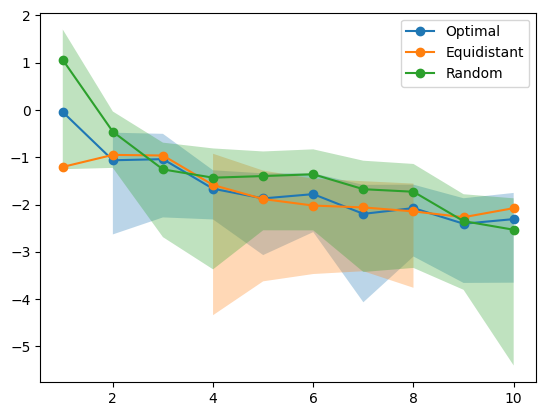

In [176]:
dif_ed = jnp.linalg.norm(ED_MLEs - true_args, axis=-1)
dif_noed = jnp.linalg.norm(NOED_MLEs - true_args, axis=-1)
dif_random = jnp.linalg.norm(random_MLEs - true_args, axis=-1)

dif_ed_mean = jnp.mean(dif_ed, axis=1)
dif_noed_mean = jnp.mean(dif_noed, axis=1)
dif_ed_var = jnp.std(dif_ed, axis=1)
dif_noed_var = jnp.std(dif_noed, axis=1)

dif_random_mean = jnp.mean(dif_random, axis=1)  
dif_random_var = jnp.std(dif_random, axis=1)


plt.plot(range(1,len(dif_ed_mean)+1), jnp.log(dif_ed_mean), '-o', label = "Optimal")
plt.plot(range(1,len(dif_noed_mean)+1), jnp.log(dif_noed_mean), '-o', label = "Equidistant")
plt.plot(range(1,len(dif_random_mean)+1), jnp.log(dif_random_mean), '-o', label = "Random")

plt.fill_between(range(1, len(dif_ed_mean)+1), jnp.log(dif_ed_mean - dif_ed_var), jnp.log(dif_ed_mean + dif_ed_var), alpha=0.3)

plt.fill_between(range(1, len(dif_noed_mean)+1), jnp.log(dif_noed_mean - dif_noed_var), jnp.log(dif_noed_mean + dif_noed_var), alpha=0.3)
plt.fill_between(range(1, len(dif_random_mean)+1), jnp.log(dif_random_mean - dif_random_var), jnp.log(dif_random_mean + dif_random_var), alpha=0.3)

plt.legend()
# mu = jnp.mean(Means, axis=1)
# var = jax.vmap(get_dif_std, in_axes = [0, None])(ED_MLEs, jnp.array([-0.5, -4.1]))/jnp.sqrt(ED_MLEs.shape[-2])

# NOED_Means = jax.vmap(lambda x, y: get_dif_mean(x, y), in_axes = [0, None])(NOED_MLEs, true_args)
# NOED_mu = jnp.mean(NOED_Means, axis=1)
# NOED_var = jax.vmap(get_dif_std, in_axes = [0, None])(NOED_MLEs, jnp.array([-0.5, -4.1]))/jnp.sqrt(NOED_MLEs.shape[-2])

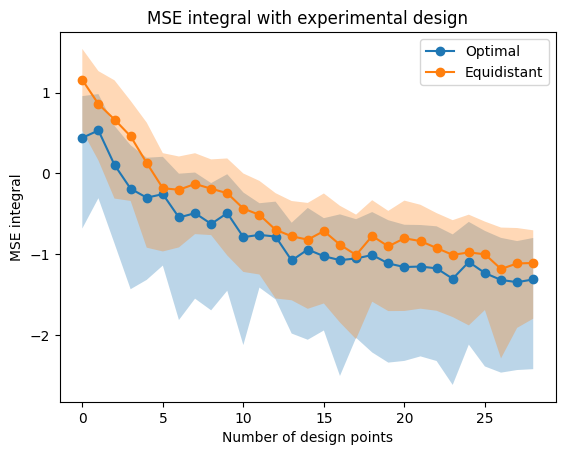

In [177]:
NOED_MSE = jnp.linalg.norm(NOED_pred_trajs - true_traj, axis=-1)
NOED_MSE_ = jnp.mean(NOED_MSE, axis=-1)
mean_NOED_MSE = jnp.mean(NOED_MSE_, axis=-1)
var_NOED_MSE = jnp.std(NOED_MSE_, axis=-1)

MSE = jnp.linalg.norm(pred_trajs - true_traj, axis=-1)
MSE_ = jnp.mean(MSE, axis=-1)  
mean_ED_MSE = jnp.mean(MSE_, axis=-1)
var_ED_MSE = jnp.std(MSE_, axis=-1)




plt.plot(jnp.log(mean_ED_MSE), '-o', label = "Optimal")
plt.plot(jnp.log(mean_NOED_MSE), '-o', label = "Equidistant")
plt.fill_between(range(len(mean_ED_MSE)), jnp.log(mean_ED_MSE - var_ED_MSE), jnp.log(mean_ED_MSE + var_ED_MSE), alpha=0.3)
plt.fill_between(range(len(mean_NOED_MSE)), jnp.log(mean_NOED_MSE - var_NOED_MSE), jnp.log(mean_NOED_MSE + var_NOED_MSE), alpha=0.3)
plt.title('MSE integral with experimental design')
plt.xlabel('Number of design points')
plt.ylabel('MSE integral')
plt.legend()
plt.show()

# MM

In [506]:
# Low noise: sigma = 2 / params [-0.3, -2.0]
ED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/MM_0214/MM_v1_ED.pkl")[1:]
NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/MM_0214/MM_v1_NOED.pkl")[1:]
# random_NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/S1_0213_MLE_100/s1_v2_NOED_random.pkl")[1:]

true_param = jnp.array([70.0, 45.0])
true_x0 = jnp.array([110])
ti = jnp.linspace(0, 10, 1000)

In [352]:
# High noise: sigma = 5 / params [-0.3, -2.0]
ED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/MM_0214/MM_v2_ED.pkl")[0:-1]
NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/MM_0214/MM_v2_NOED.pkl")[1:]
# random_NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/S1_0213_MLE_100/s1_v2_NOED_random.pkl")[1:]

true_param = jnp.array([70.0, 45.0])
true_x0 = jnp.array([110])
ti = jnp.linspace(0, 10, 1000)

In [334]:
# Low noise: sigma = 2 / params [-0.3, -2.0]
ED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/MM_0214/MM_v5_ED.pkl")[1:6]
NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/MM_0214/MM_v5_NOED.pkl")[1:6]
# random_NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/S1_0213_MLE_100/s1_v2_NOED_random.pkl")[1:]

true_param = jnp.array([70.0, 45.0])
true_x0 = jnp.array([110])
ti = jnp.linspace(0, 10, 1000)

In [531]:
# High noise: sigma = 2 / params [-0.3, -2.0]
ED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/MM_0214_2/s1_v5_ED.pkl")[1:]
NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/MM_0214_2/s1_v5_NOED.pkl")[1:]
# random_NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/S1_0213_MLE_100/s1_v2_NOED_random.pkl")[1:]

true_param = jnp.array([70.0, 45.0])
true_x0 = jnp.array([110])
ti = jnp.linspace(0, 10, 1000)

In [1138]:
# Low noise: sigma = 5 / params [-0.3, -2.0]
ED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/MM_0215/MM_ED_v5")[1:12]
NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/MM_0215/MM_NOED_v5.pkl")[1:12]
# random_NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/S1_0213_MLE_100/s1_v2_NOED_random.pkl")[1:]

true_param = jnp.array([70.0, 45.0])
true_x0 = jnp.array([110])
ti = jnp.linspace(0, 10, 1000)

In [1139]:
ED_MLEs_ic = ED_MLEs[:, :, 0, :]
# If negative make zero:
# ED_MLEs_ic = jnp.where(ED_MLEs_ic < 0, 45, ED_MLEs_ic)
NOED_MLEs_ic = NOED_MLEs[:, :, 0, :]
# random_NOED_MLEs_ic = random_NOED_MLEs[:, :, 0, :]

true_traj = solve(ti, true_x0, true_param, s3_vfield)

solve_map = jax.vmap(lambda u: solve(ti, true_x0, u, s3_vfield), in_axes=[0])
pred_trajs = jax.vmap(solve_map, in_axes=[0])(ED_MLEs_ic)
NOED_pred_trajs = jax.vmap(solve_map)(NOED_MLEs_ic)
# random_NOED_pred_trajs = jax.vmap(solve_map)(random_NOED_MLEs_ic)

# pred_trajs = jax.vmap(solve, in_axes=[None, None, 0, None])(ti, jnp.array([5.0,0.0]), mean_ED_MLE_ic, s1_vfield)
# NOED_pred_traj = jax.vmap(solve, in_axes=[None, None, 0, None])(ti, jnp.array([5.0,0.0]), mean_NOED_MLE_ic, s1_vfield)

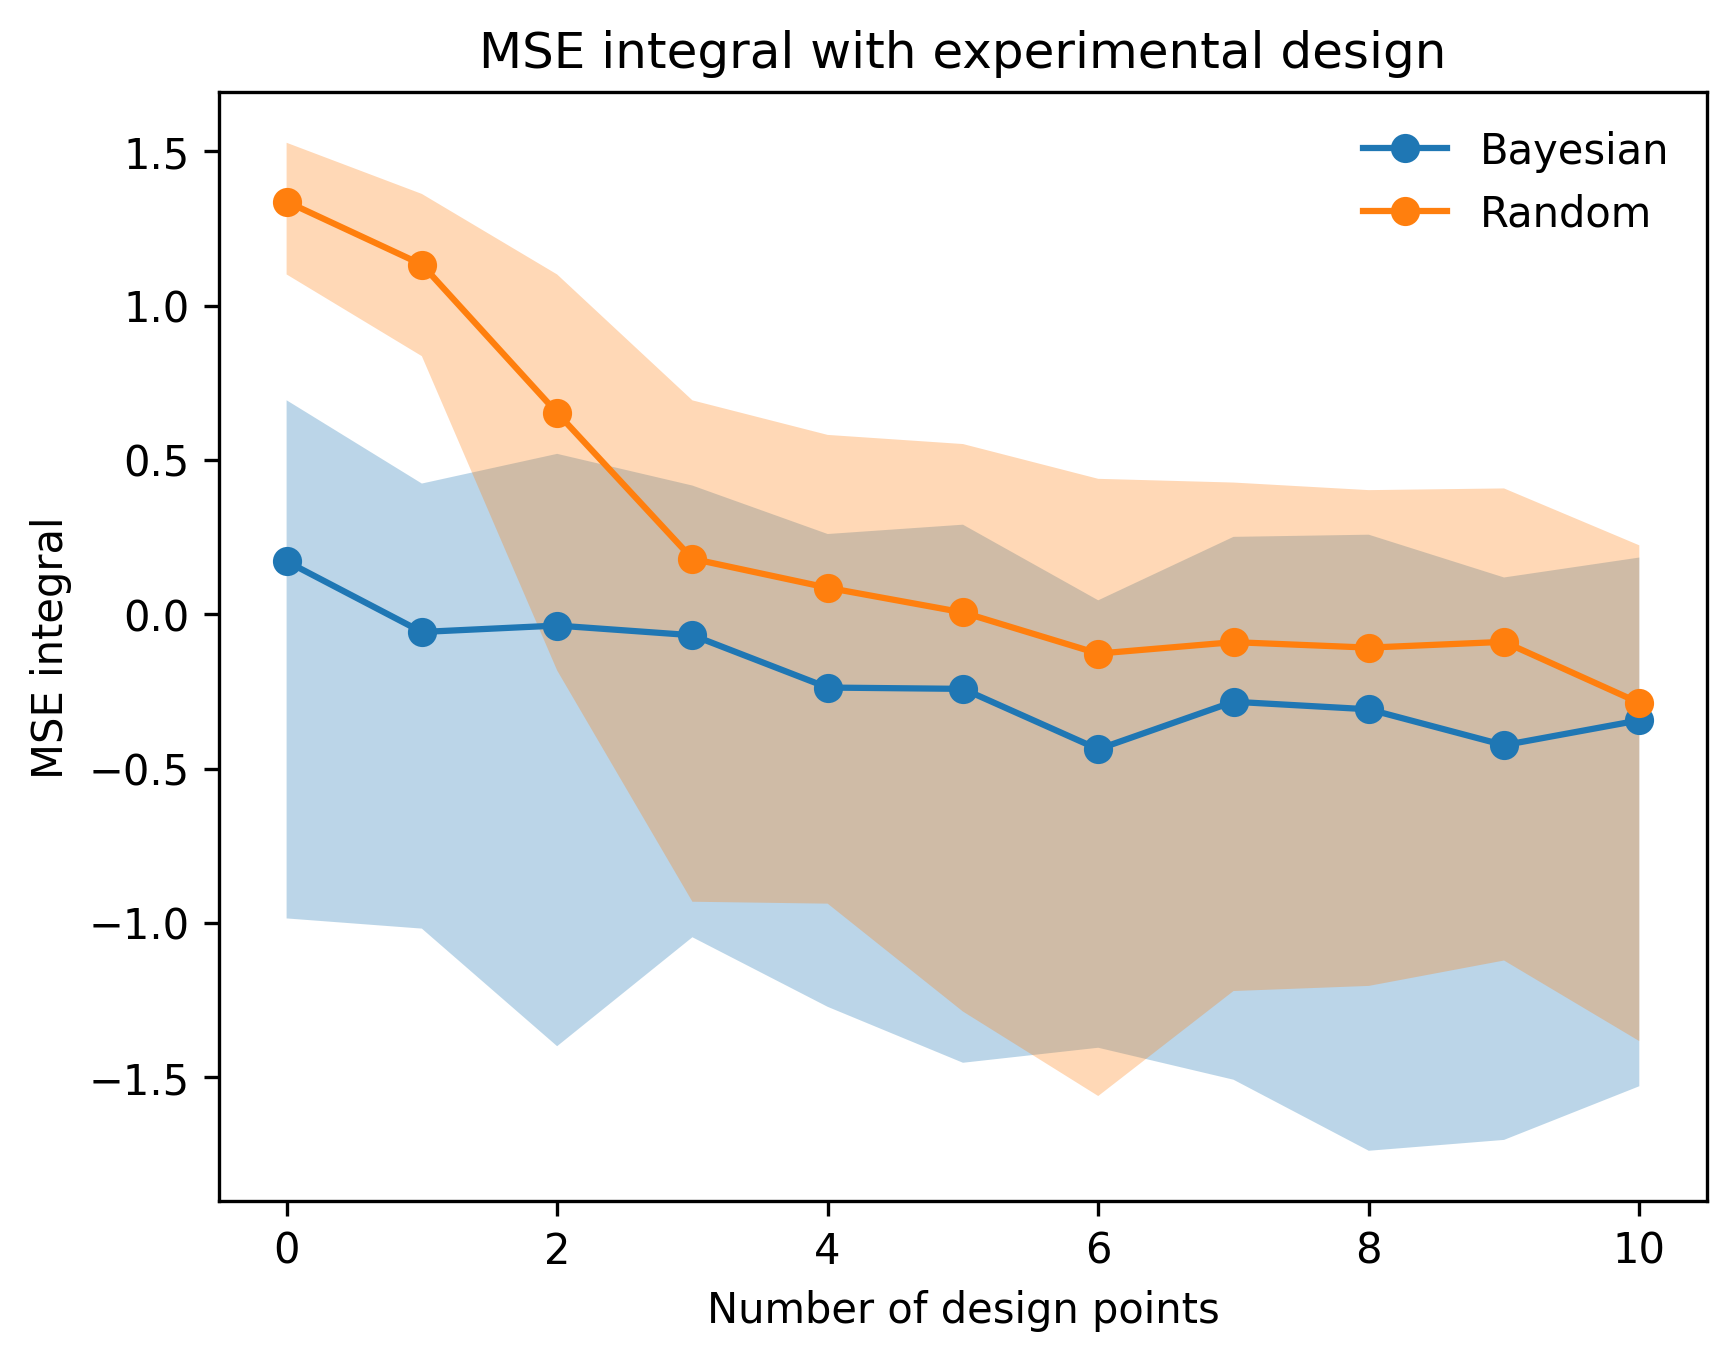

In [1140]:
NOED_MSE = jnp.linalg.norm(NOED_pred_trajs - true_traj, axis=-1)
NOED_MSE_ = jnp.mean(NOED_MSE, axis=-1)
mean_NOED_MSE = jnp.mean(NOED_MSE_, axis=-1)
var_NOED_MSE = jnp.std(NOED_MSE_, axis=-1)#/jnp.sqrt(NOED_MLEs_ic.shape[1])

# random_NOED_MSE = jnp.linalg.norm(random_NOED_pred_trajs - true_traj, axis=-1)
# random_NOED_MSE_ = jnp.mean(random_NOED_MSE, axis=-1)
# mean_random_NOED_MSE = jnp.mean(random_NOED_MSE_, axis=-1)
# var_random_NOED_MSE = jnp.std(random_NOED_MSE_, axis=-1)#/jnp.sqrt(random_NOED_MLEs_ic.shape[1])

MSE = jnp.linalg.norm(pred_trajs - true_traj, axis=-1)
MSE_ = jnp.mean(MSE, axis=-1)  
mean_ED_MSE = jnp.mean(MSE_, axis=-1)
var_ED_MSE = jnp.std(MSE_, axis=-1)#/jnp.sqrt(ED_MLEs_ic.shape[1])

plt.figure(dpi=300)
plt.plot(jnp.log(mean_ED_MSE), '-o', label = "Bayesian")
plt.plot(jnp.log(mean_NOED_MSE), '-o', label = "Random")
# plt.plot(jnp.log(mean_random_NOED_MSE), '-o', label = "Random")

plt.fill_between(range(len(mean_ED_MSE)), jnp.log(mean_ED_MSE - var_ED_MSE), jnp.log(mean_ED_MSE + var_ED_MSE), alpha=0.3)
plt.fill_between(range(len(mean_NOED_MSE)), jnp.log(mean_NOED_MSE - var_NOED_MSE), jnp.log(mean_NOED_MSE + var_NOED_MSE), alpha=0.3)
# plt.fill_between(range(len(mean_random_NOED_MSE)), jnp.log(mean_random_NOED_MSE - var_random_NOED_MSE), jnp.log(mean_random_NOED_MSE + var_random_NOED_MSE), alpha=0.3)

plt.title('MSE integral with experimental design')
plt.xlabel('Number of design points')
plt.ylabel('MSE integral')
plt.legend(frameon=False)
plt.show()


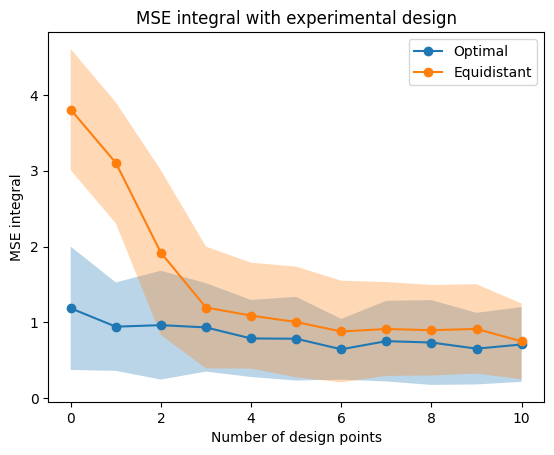

In [1141]:
NOED_MSE = jnp.linalg.norm(NOED_pred_trajs - true_traj, axis=-1)
NOED_MSE_ = jnp.mean(NOED_MSE, axis=-1)
mean_NOED_MSE = jnp.mean(NOED_MSE_, axis=-1)
var_NOED_MSE = jnp.std(NOED_MSE_, axis=-1)#/jnp.sqrt(NOED_MLEs_ic.shape[1])

# random_NOED_MSE = jnp.linalg.norm(random_NOED_pred_trajs - true_traj, axis=-1)
# random_NOED_MSE_ = jnp.mean(random_NOED_MSE, axis=-1)
# mean_random_NOED_MSE = jnp.mean(random_NOED_MSE_, axis=-1)
# var_random_NOED_MSE = jnp.std(random_NOED_MSE_, axis=-1)#/jnp.sqrt(random_NOED_MLEs_ic.shape[1])

MSE = jnp.linalg.norm(pred_trajs - true_traj, axis=-1)
MSE_ = jnp.mean(MSE, axis=-1)  
mean_ED_MSE = jnp.mean(MSE_, axis=-1)
var_ED_MSE = jnp.std(MSE_, axis=-1)#/jnp.sqrt(ED_MLEs_ic.shape[1])


plt.plot(mean_ED_MSE, '-o', label = "Optimal")
plt.plot(mean_NOED_MSE, '-o', label = "Equidistant")
# plt.plot(mean_random_NOED_MSE, '-o', label = "Random")

plt.fill_between(range(len(mean_ED_MSE)), mean_ED_MSE - var_ED_MSE, mean_ED_MSE + var_ED_MSE, alpha=0.3)
plt.fill_between(range(len(mean_NOED_MSE)), mean_NOED_MSE - var_NOED_MSE, mean_NOED_MSE + var_NOED_MSE, alpha=0.3)
# plt.fill_between(range(len(mean_random_NOED_MSE)), mean_random_NOED_MSE - var_random_NOED_MSE, mean_random_NOED_MSE + var_random_NOED_MSE, alpha=0.3)

plt.title('MSE integral with experimental design')
plt.xlabel('Number of design points')
plt.ylabel('MSE integral')
plt.legend()
plt.show()


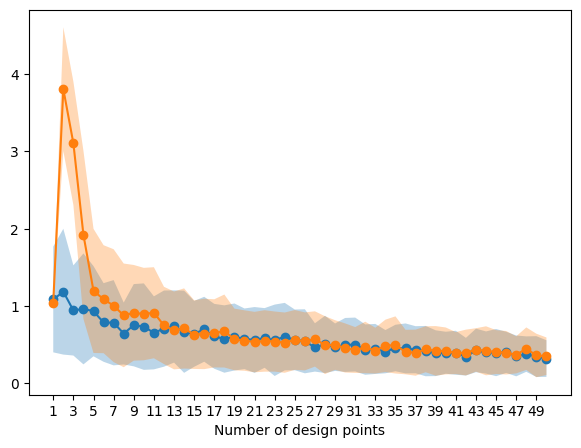

In [811]:
qplot(mean_ED_MSE, var_ED_MSE, mean_NOED_MSE, var_NOED_MSE)

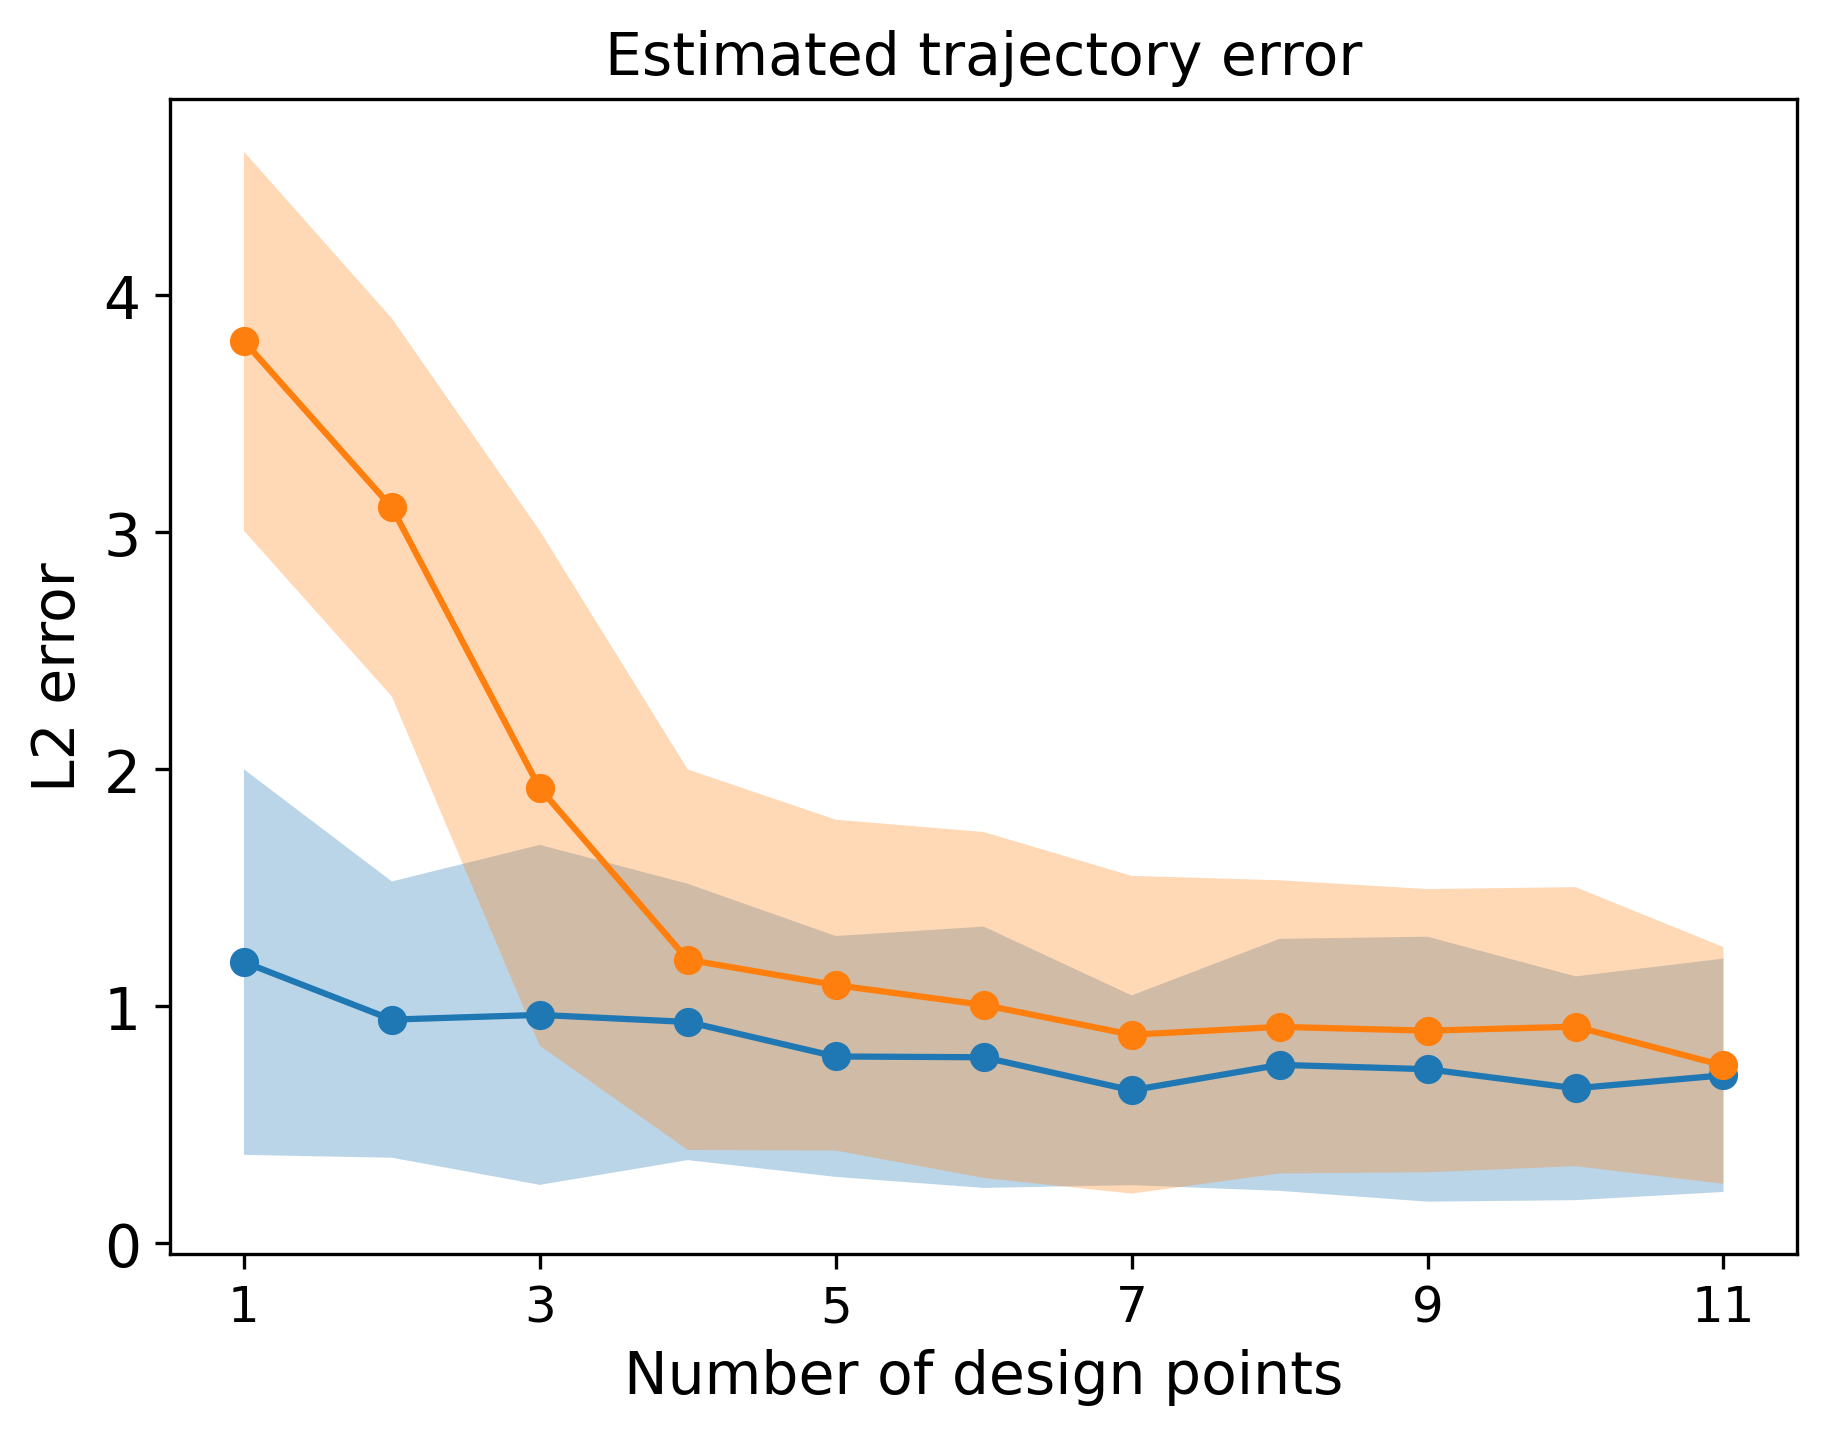

In [1142]:
NOED_MSE = jnp.linalg.norm(NOED_pred_trajs - true_traj, axis=-1) #/ jnp.linalg.norm(true_traj, axis=-1)**2
NOED_MSE_ = jnp.mean(NOED_MSE, axis=-1)
mean_NOED_MSE = jnp.mean(NOED_MSE_, axis=-1)
var_NOED_MSE = jnp.std(NOED_MSE_, axis=-1)
# min_mean_NOED_MSE = jnp.min(NOED_MSE_, axis=-1)
# max_mean_NOED_MSE = jnp.max(NOED_MSE_, axis=-1)

MSE = jnp.linalg.norm(pred_trajs - true_traj, axis=-1) #/ jnp.linalg.norm(true_traj, axis=-1)**2
MSE_ = jnp.mean(MSE, axis=-1)  
mean_ED_MSE = jnp.mean(MSE_, axis=-1)
var_ED_MSE = jnp.std(MSE_, axis=-1) 


qplot(mean_ED_MSE, var_ED_MSE, mean_NOED_MSE, var_NOED_MSE, title='Estimated trajectory error', y_label='L2 error', dpi=300)

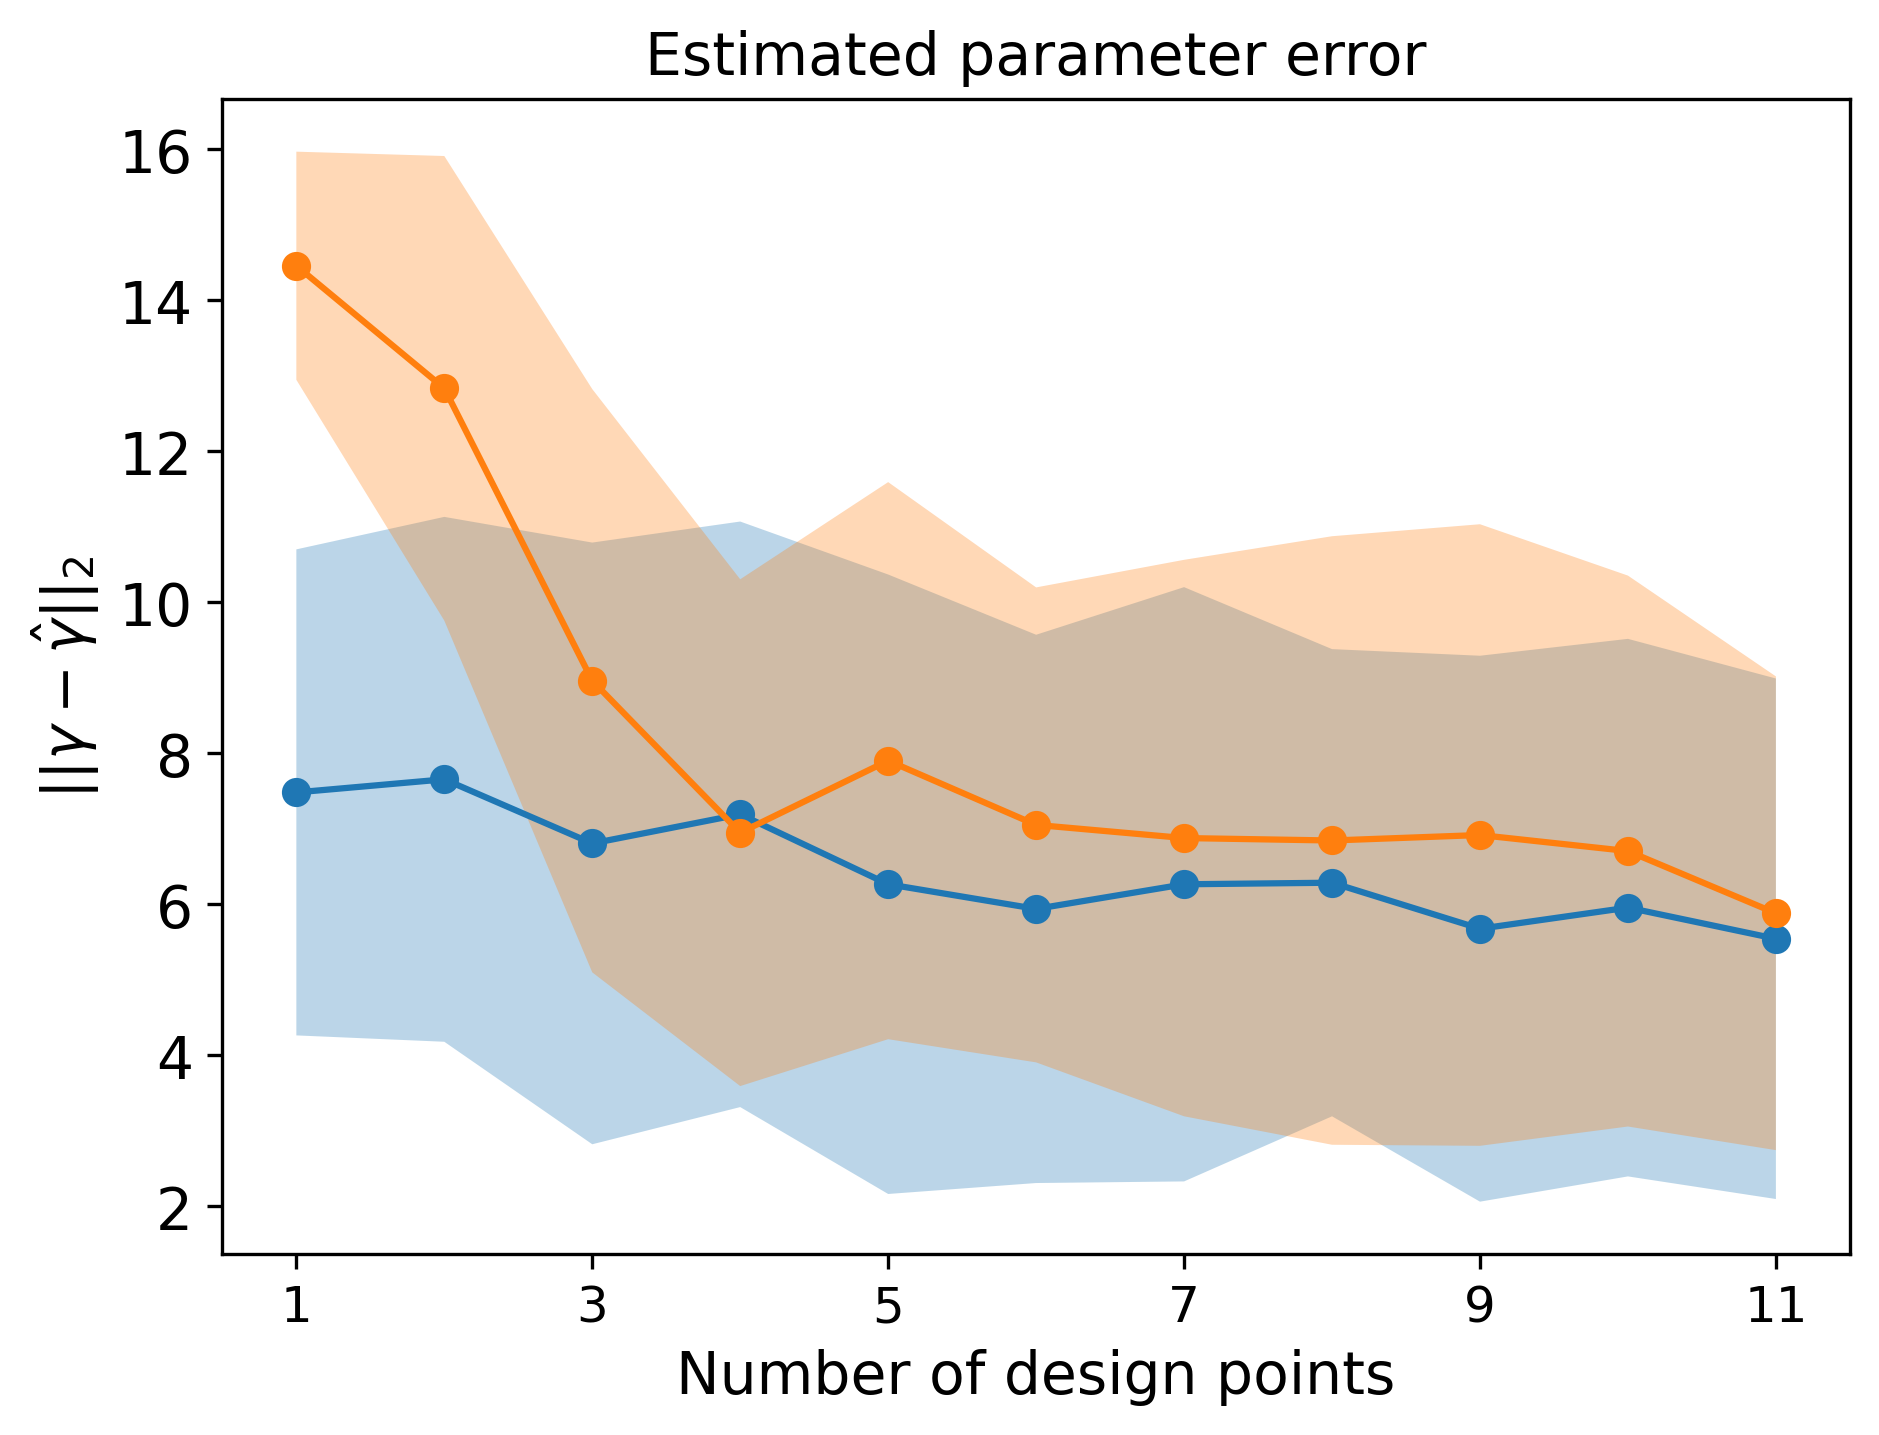

In [1144]:
mu = jnp.mean(jnp.linalg.norm(ED_MLEs_ic - true_param, axis=-1), axis=[1])    
NOED_mu = jnp.mean(jnp.linalg.norm(NOED_MLEs_ic - true_param, axis=-1), axis=[1])

var = jnp.std(jnp.linalg.norm(ED_MLEs_ic - true_param, axis=-1), axis=[1])#/jnp.sqrt(ED_MLEs_ic.shape[1])
NOED_var = jnp.std(jnp.linalg.norm(NOED_MLEs_ic - true_param, axis=-1), axis=[1])#/jnp.sqrt(NOED_MLEs_ic.shape[1])
qplot(mu, var, NOED_mu, NOED_var, y_label=r'$||\gamma - \hat{\gamma}||_2$', title='Estimated parameter error', dpi=300)

# VDP

In [1223]:
# Low noise: sigma = 2 / params [-0.3, -2.0]
ED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/VDP_0215/VDP_ED_v0.5.pkl")[0:11]
NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/VDP_0215/VDP_NOED_v0.5.pkl")[0:6]
random_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/VDP_0215/VDP_random_v0.5.pkl")[0:11]

# random_NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/S1_0213_MLE_100/s1_v2_NOED_random.pkl")[1:]

true_param = jnp.array([1.5])
true_x0 = jnp.array([2.0, 2.0])
ti = jnp.linspace(0, 10, 1000)
vector_field = s5_vfield

In [1203]:
# IC study
# Low noise: sigma = 2 / params [-0.3, -2.0]
ED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/VDP_0215/VDP_ED_v0.5_IC_Screen.pkl")
NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/VDP_0215/VDP_NOED_v0.5_IC_Screen.pkl")
# random_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/VDP_0215/VDP_random_v0.5.pkl")[0:11]

# random_NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/S1_0213_MLE_100/s1_v2_NOED_random.pkl")[1:]

true_param = jnp.array([1.5])
true_x0 = jnp.array([2.0, 2.0])
ti = jnp.linspace(0, 10, 1000)
vector_field = s5_vfield

In [1194]:
# IC study
# Low noise: sigma = 2 / params [-0.3, -2.0]
ED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/VDP_0215/VDP_ED_v0.5_IC_Screen_2.pkl")[1:8]
NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/VDP_0215/VDP_NOED_v0.5_IC_Screen_2.pkl")[1:8]
random_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/VDP_0215/VDP_random_v0.5_IC_Screen_2.pkl")[1:8]

# random_NOED_MLEs = load_from_file("/Users/antanas/GitRepo/NODE/Results/S1_0213_MLE_100/s1_v2_NOED_random.pkl")[1:]

true_param = jnp.array([1.5])
true_x0 = jnp.array([2.0, 2.0])
ti = jnp.linspace(0, 10, 1000)
vector_field = s5_vfield

In [1224]:
ED_MLEs_ic = ED_MLEs[:, :, 0, :]
# If negative make zero:
# ED_MLEs_ic = jnp.where(ED_MLEs_ic < 0, 45, ED_MLEs_ic)
NOED_MLEs_ic = NOED_MLEs[:, :, 0, :]
random_NOED_MLEs_ic = random_MLEs[:, :, 0, :]

true_traj = solve(ti, true_x0, true_param, vector_field)

solve_map = jax.vmap(lambda u: solve(ti, true_x0, u, vector_field), in_axes=[0])
pred_trajs = jax.vmap(solve_map, in_axes=[0])(ED_MLEs_ic)
NOED_pred_trajs = jax.vmap(solve_map)(NOED_MLEs_ic)
random_NOED_pred_trajs = jax.vmap(solve_map)(random_NOED_MLEs_ic)

# pred_trajs = jax.vmap(solve, in_axes=[None, None, 0, None])(ti, jnp.array([5.0,0.0]), mean_ED_MLE_ic, s1_vfield)
# NOED_pred_traj = jax.vmap(solve, in_axes=[None, None, 0, None])(ti, jnp.array([5.0,0.0]), mean_NOED_MLE_ic, s1_vfield)

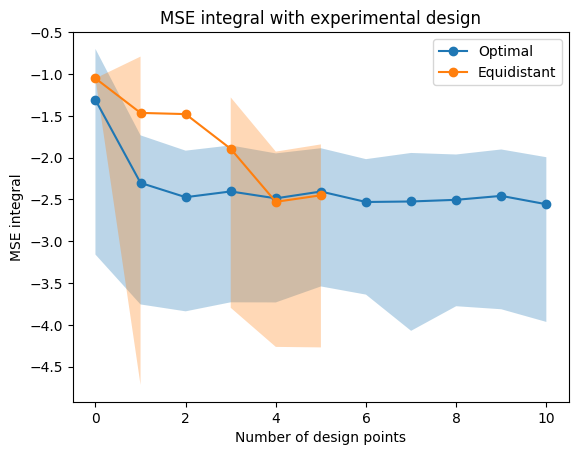

In [1208]:
NOED_MSE = jnp.linalg.norm(NOED_pred_trajs - true_traj, axis=-1)
NOED_MSE_ = jnp.mean(NOED_MSE, axis=-1)
mean_NOED_MSE = jnp.mean(NOED_MSE_, axis=-1)
var_NOED_MSE = jnp.std(NOED_MSE_, axis=-1)#/jnp.sqrt(NOED_MLEs_ic.shape[1])

random_NOED_MSE = jnp.linalg.norm(random_NOED_pred_trajs - true_traj, axis=-1)
random_NOED_MSE_ = jnp.mean(random_NOED_MSE, axis=-1)
mean_random_NOED_MSE = jnp.mean(random_NOED_MSE_, axis=-1)
var_random_NOED_MSE = jnp.std(random_NOED_MSE_, axis=-1)#/jnp.sqrt(random_NOED_MLEs_ic.shape[1])

MSE = jnp.linalg.norm(pred_trajs - true_traj, axis=-1)
MSE_ = jnp.mean(MSE, axis=-1)  
mean_ED_MSE = jnp.mean(MSE_, axis=-1)
var_ED_MSE = jnp.std(MSE_, axis=-1)#/jnp.sqrt(ED_MLEs_ic.shape[1])


plt.plot(jnp.log(mean_ED_MSE), '-o', label = "Optimal")
plt.plot(jnp.log(mean_NOED_MSE), '-o', label = "Equidistant")
# plt.plot(jnp.log(mean_random_NOED_MSE), '-o', label = "Random")

plt.fill_between(range(len(mean_ED_MSE)), jnp.log(mean_ED_MSE - var_ED_MSE), jnp.log(mean_ED_MSE + var_ED_MSE), alpha=0.3)
plt.fill_between(range(len(mean_NOED_MSE)), jnp.log(mean_NOED_MSE - var_NOED_MSE), jnp.log(mean_NOED_MSE + var_NOED_MSE), alpha=0.3)
# plt.fill_between(range(len(mean_random_NOED_MSE)), jnp.log(mean_random_NOED_MSE - var_random_NOED_MSE), jnp.log(mean_random_NOED_MSE + var_random_NOED_MSE), alpha=0.3)

plt.title('MSE integral with experimental design')
plt.xlabel('Number of design points')
plt.ylabel('MSE integral')
plt.legend()
plt.show()


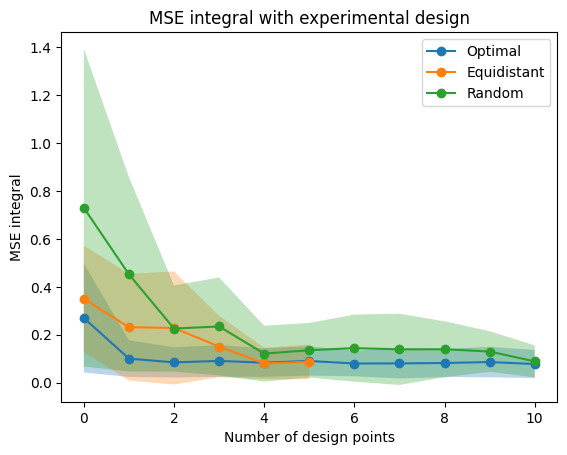

In [1209]:
NOED_MSE = jnp.linalg.norm(NOED_pred_trajs - true_traj, axis=-1)
NOED_MSE_ = jnp.mean(NOED_MSE, axis=-1)
mean_NOED_MSE = jnp.mean(NOED_MSE_, axis=-1)
var_NOED_MSE = jnp.std(NOED_MSE_, axis=-1)#/jnp.sqrt(NOED_MLEs_ic.shape[1])
var_NOED_MSE = var_NOED_MSE.at[0].set(var_NOED_MSE[1])

random_NOED_MSE = jnp.linalg.norm(random_NOED_pred_trajs - true_traj, axis=-1)
random_NOED_MSE_ = jnp.mean(random_NOED_MSE, axis=-1)
mean_random_NOED_MSE = jnp.mean(random_NOED_MSE_, axis=-1)
var_random_NOED_MSE = jnp.std(random_NOED_MSE_, axis=-1)#/jnp.sqrt(random_NOED_MLEs_ic.shape[1])

MSE = jnp.linalg.norm(pred_trajs - true_traj, axis=-1)
MSE_ = jnp.mean(MSE, axis=-1)  
mean_ED_MSE = jnp.mean(MSE_, axis=-1)
var_ED_MSE = jnp.std(MSE_, axis=-1)#/jnp.sqrt(ED_MLEs_ic.shape[1])


plt.plot(mean_ED_MSE, '-o', label = "Optimal")
plt.plot(mean_NOED_MSE, '-o', label = "Equidistant")
plt.plot(mean_random_NOED_MSE, '-o', label = "Random")

plt.fill_between(range(len(mean_ED_MSE)), mean_ED_MSE - var_ED_MSE, mean_ED_MSE + var_ED_MSE, alpha=0.3)
plt.fill_between(range(len(mean_NOED_MSE)), mean_NOED_MSE - var_NOED_MSE, mean_NOED_MSE + var_NOED_MSE, alpha=0.3)
plt.fill_between(range(len(mean_random_NOED_MSE)), mean_random_NOED_MSE - var_random_NOED_MSE, mean_random_NOED_MSE + var_random_NOED_MSE, alpha=0.3)

plt.title('MSE integral with experimental design')
plt.xlabel('Number of design points')
plt.ylabel('MSE integral')
plt.legend()
plt.show()


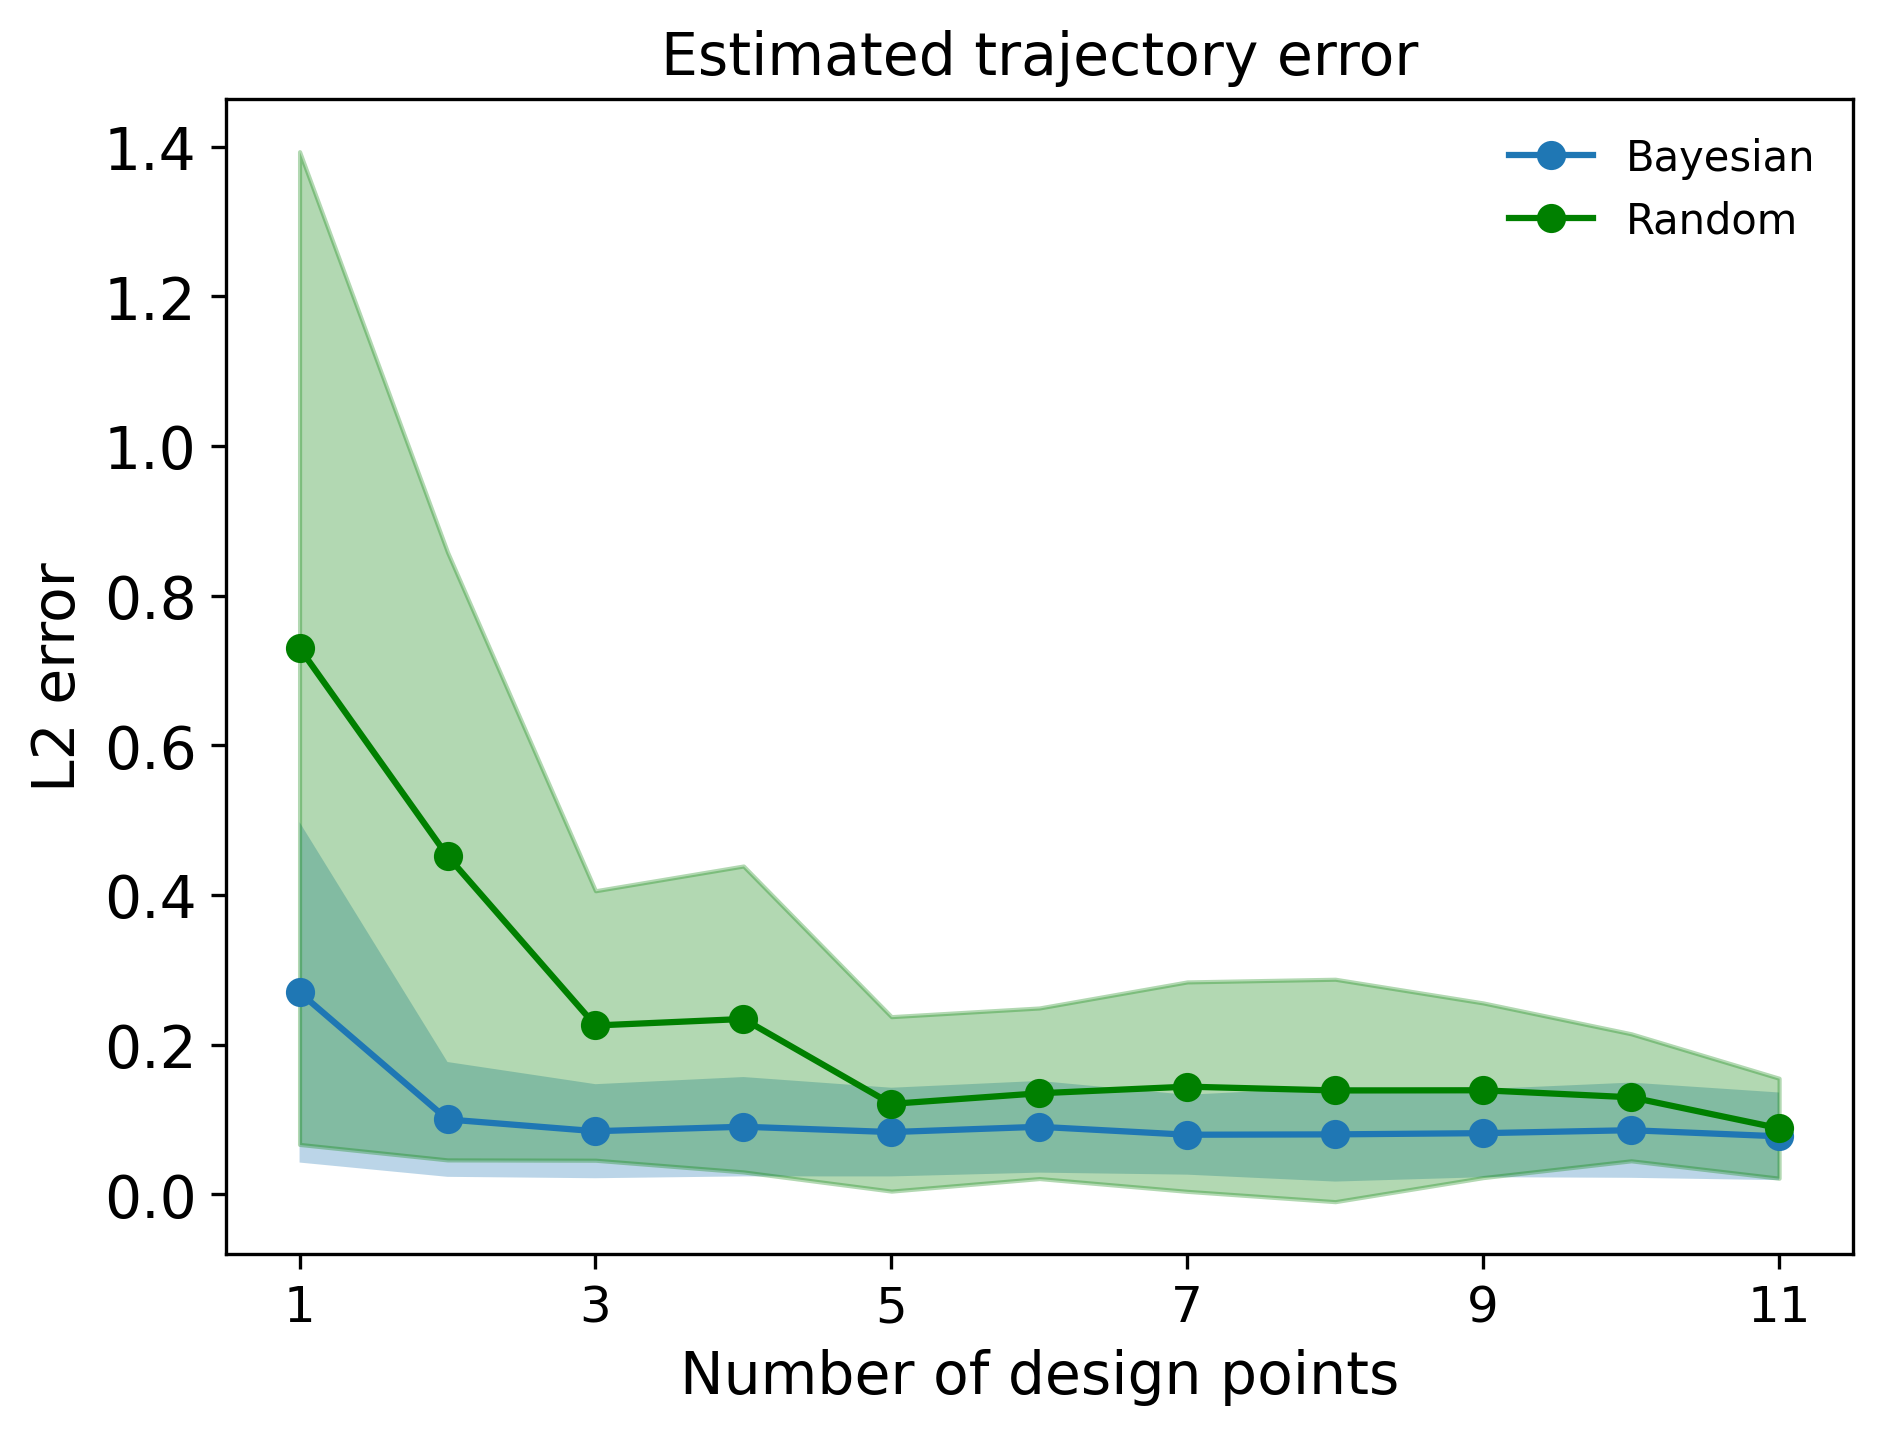

In [1232]:
qplot(mean_ED_MSE, var_ED_MSE, mean_random_NOED_MSE, var_random_NOED_MSE, title='Estimated trajectory error', y_label='L2 error', dpi=300)

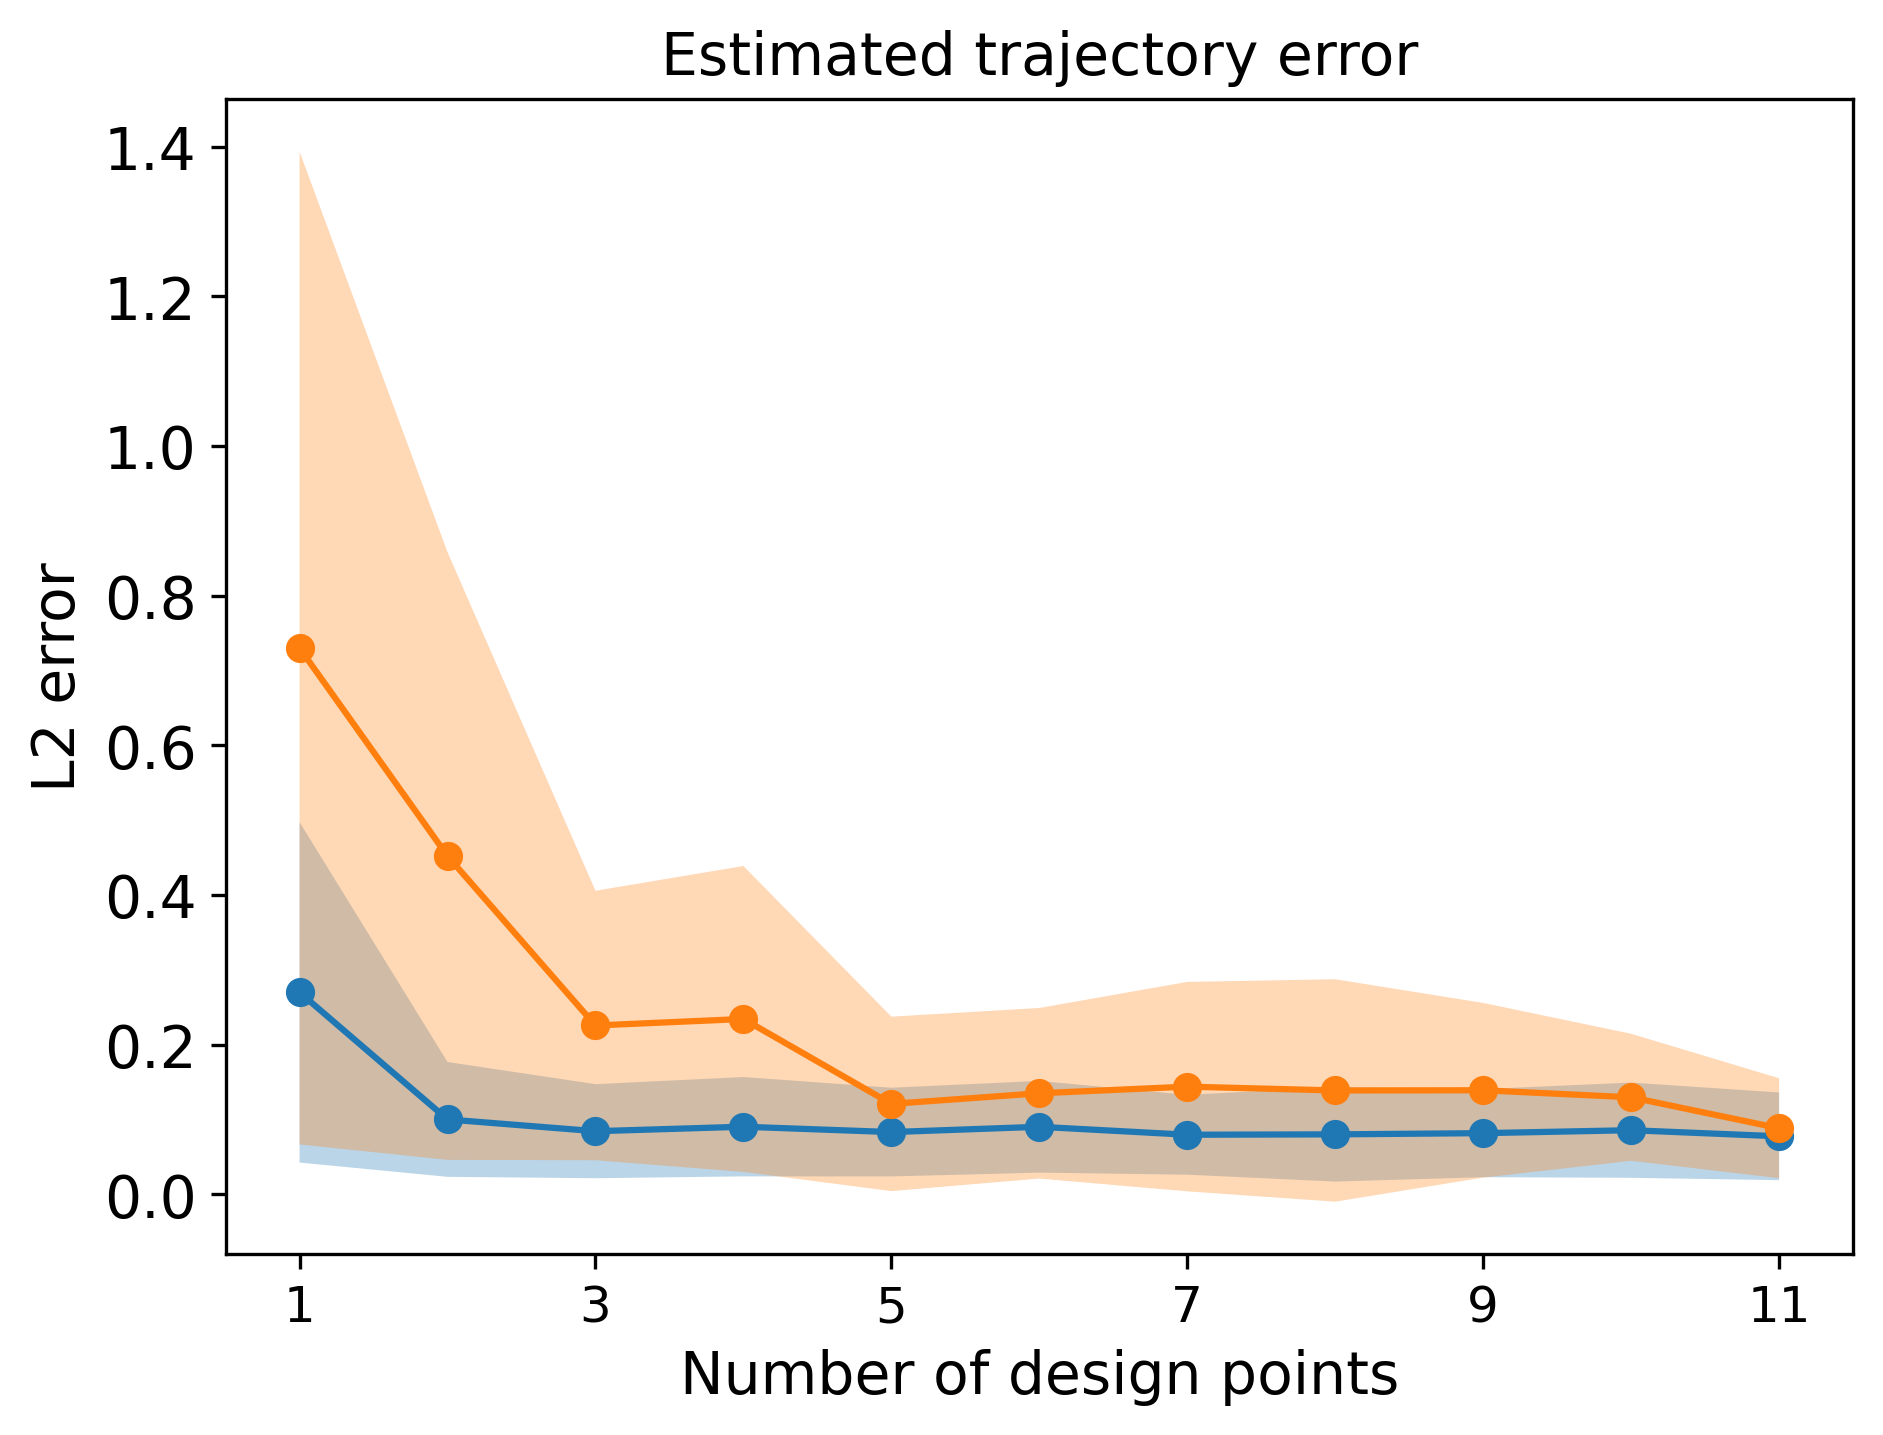

In [1153]:
qplot(mean_ED_MSE, var_ED_MSE, mean_random_NOED_MSE, var_random_NOED_MSE, title='Estimated trajectory error', y_label='L2 error', dpi=300)

In [1214]:
NOED_MSE = jnp.linalg.norm(NOED_pred_trajs - true_traj, axis=-1) #/ jnp.linalg.norm(true_traj, axis=-1)**2
NOED_MSE_ = jnp.mean(NOED_MSE, axis=(-1, -2))
mean_NOED_MSE = jnp.mean(NOED_MSE_, axis=(-1, -2))
var_NOED_MSE = jnp.std(NOED_MSE_, axis=-1)
var_NOED_MSE = var_NOED_MSE.at[0].set(var_NOED_MSE[1])
# min_mean_NOED_MSE = jnp.min(NOED_MSE_, axis=-1)
# max_mean_NOED_MSE = jnp.max(NOED_MSE_, axis=-1)

MSE = jnp.linalg.norm(pred_trajs - true_traj, axis=-1) #/ jnp.linalg.norm(true_traj, axis=-1)**2
MSE_ = jnp.mean(MSE, axis=-1)  
mean_ED_MSE = jnp.mean(MSE_, axis=-1)
var_ED_MSE = jnp.std(MSE_, axis=-1) 


qplot(mean_ED_MSE, var_ED_MSE, mean_random_NOED_MSE, var_random_NOED_MSE, title='Estimated trajectory error', y_label='L2 error', dpi=300)

IndexError: tuple index out of range

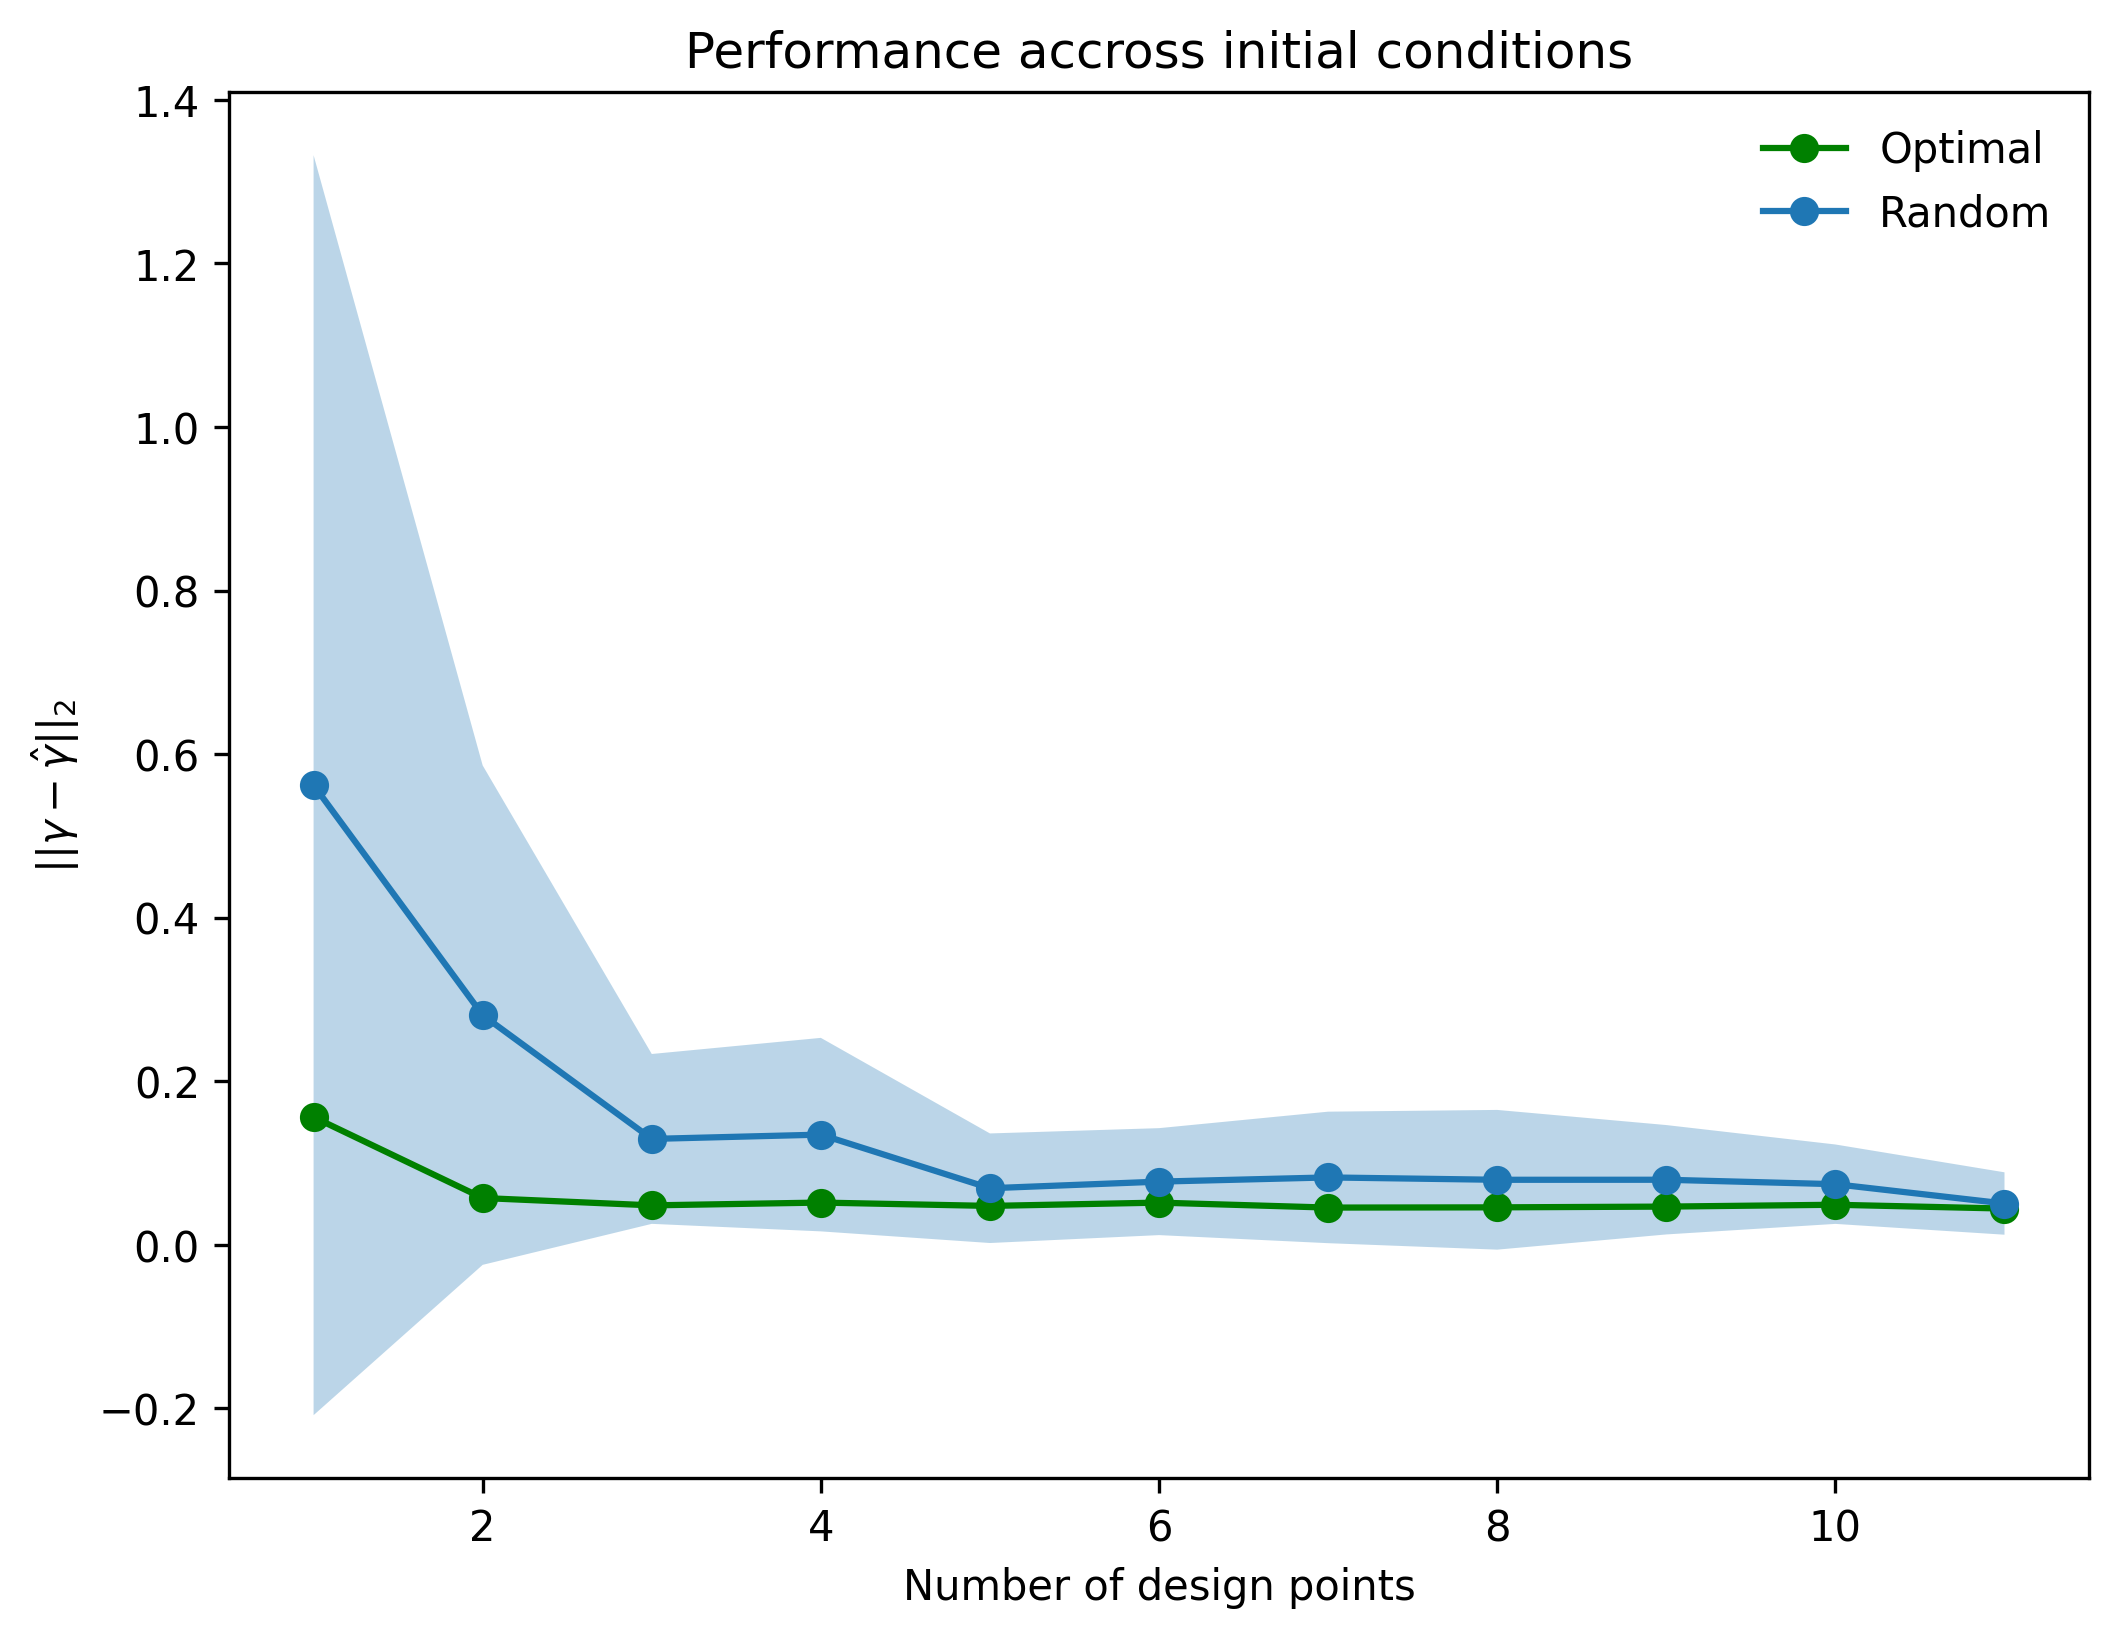

In [1228]:
mu = jnp.mean(jnp.linalg.norm(ED_MLEs_ic - true_param, axis=-1), axis=[1])    
NOED_mu = jnp.mean(jnp.linalg.norm(NOED_MLEs_ic - true_param, axis=-1), axis=[1])
random_mu = jnp.mean(jnp.linalg.norm(random_NOED_MLEs_ic - true_param, axis=-1), axis=[1])

var = jnp.std(jnp.linalg.norm(ED_MLEs_ic - true_param, axis=-1), axis=[1])#/jnp.sqrt(ED_MLEs_ic.shape[1])
NOED_var = jnp.std(jnp.linalg.norm(NOED_MLEs_ic - true_param, axis=-1), axis=[1])#/jnp.sqrt(NOED_MLEs_ic.shape[1])
random_var = jnp.std(jnp.linalg.norm(random_NOED_MLEs_ic - true_param, axis=-1), axis=[1])#/jnp.sqrt(random_NOED_MLEs_ic.shape[1])
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(range(1,len(mu)+1), mu, '-o', label = "Optimal", color = "green")
plt.plot(range(1,len(random_mu)+1), random_mu, '-o', label = "Random")
plt.fill_between(range(1,len(random_mu)+1), random_mu - random_var, random_mu + random_var, alpha=0.3)
plt.xlabel('Number of design points')
plt.ylabel(r'$||\gamma - \hat{\gamma}||_2$')
plt.title('Performance accross initial conditions')

plt.legend(frameon = False)

plt.show()


# qplot(mu, var, random_mu, random_var, y_label=r'$||\gamma - \hat{\gamma}||_2$') 

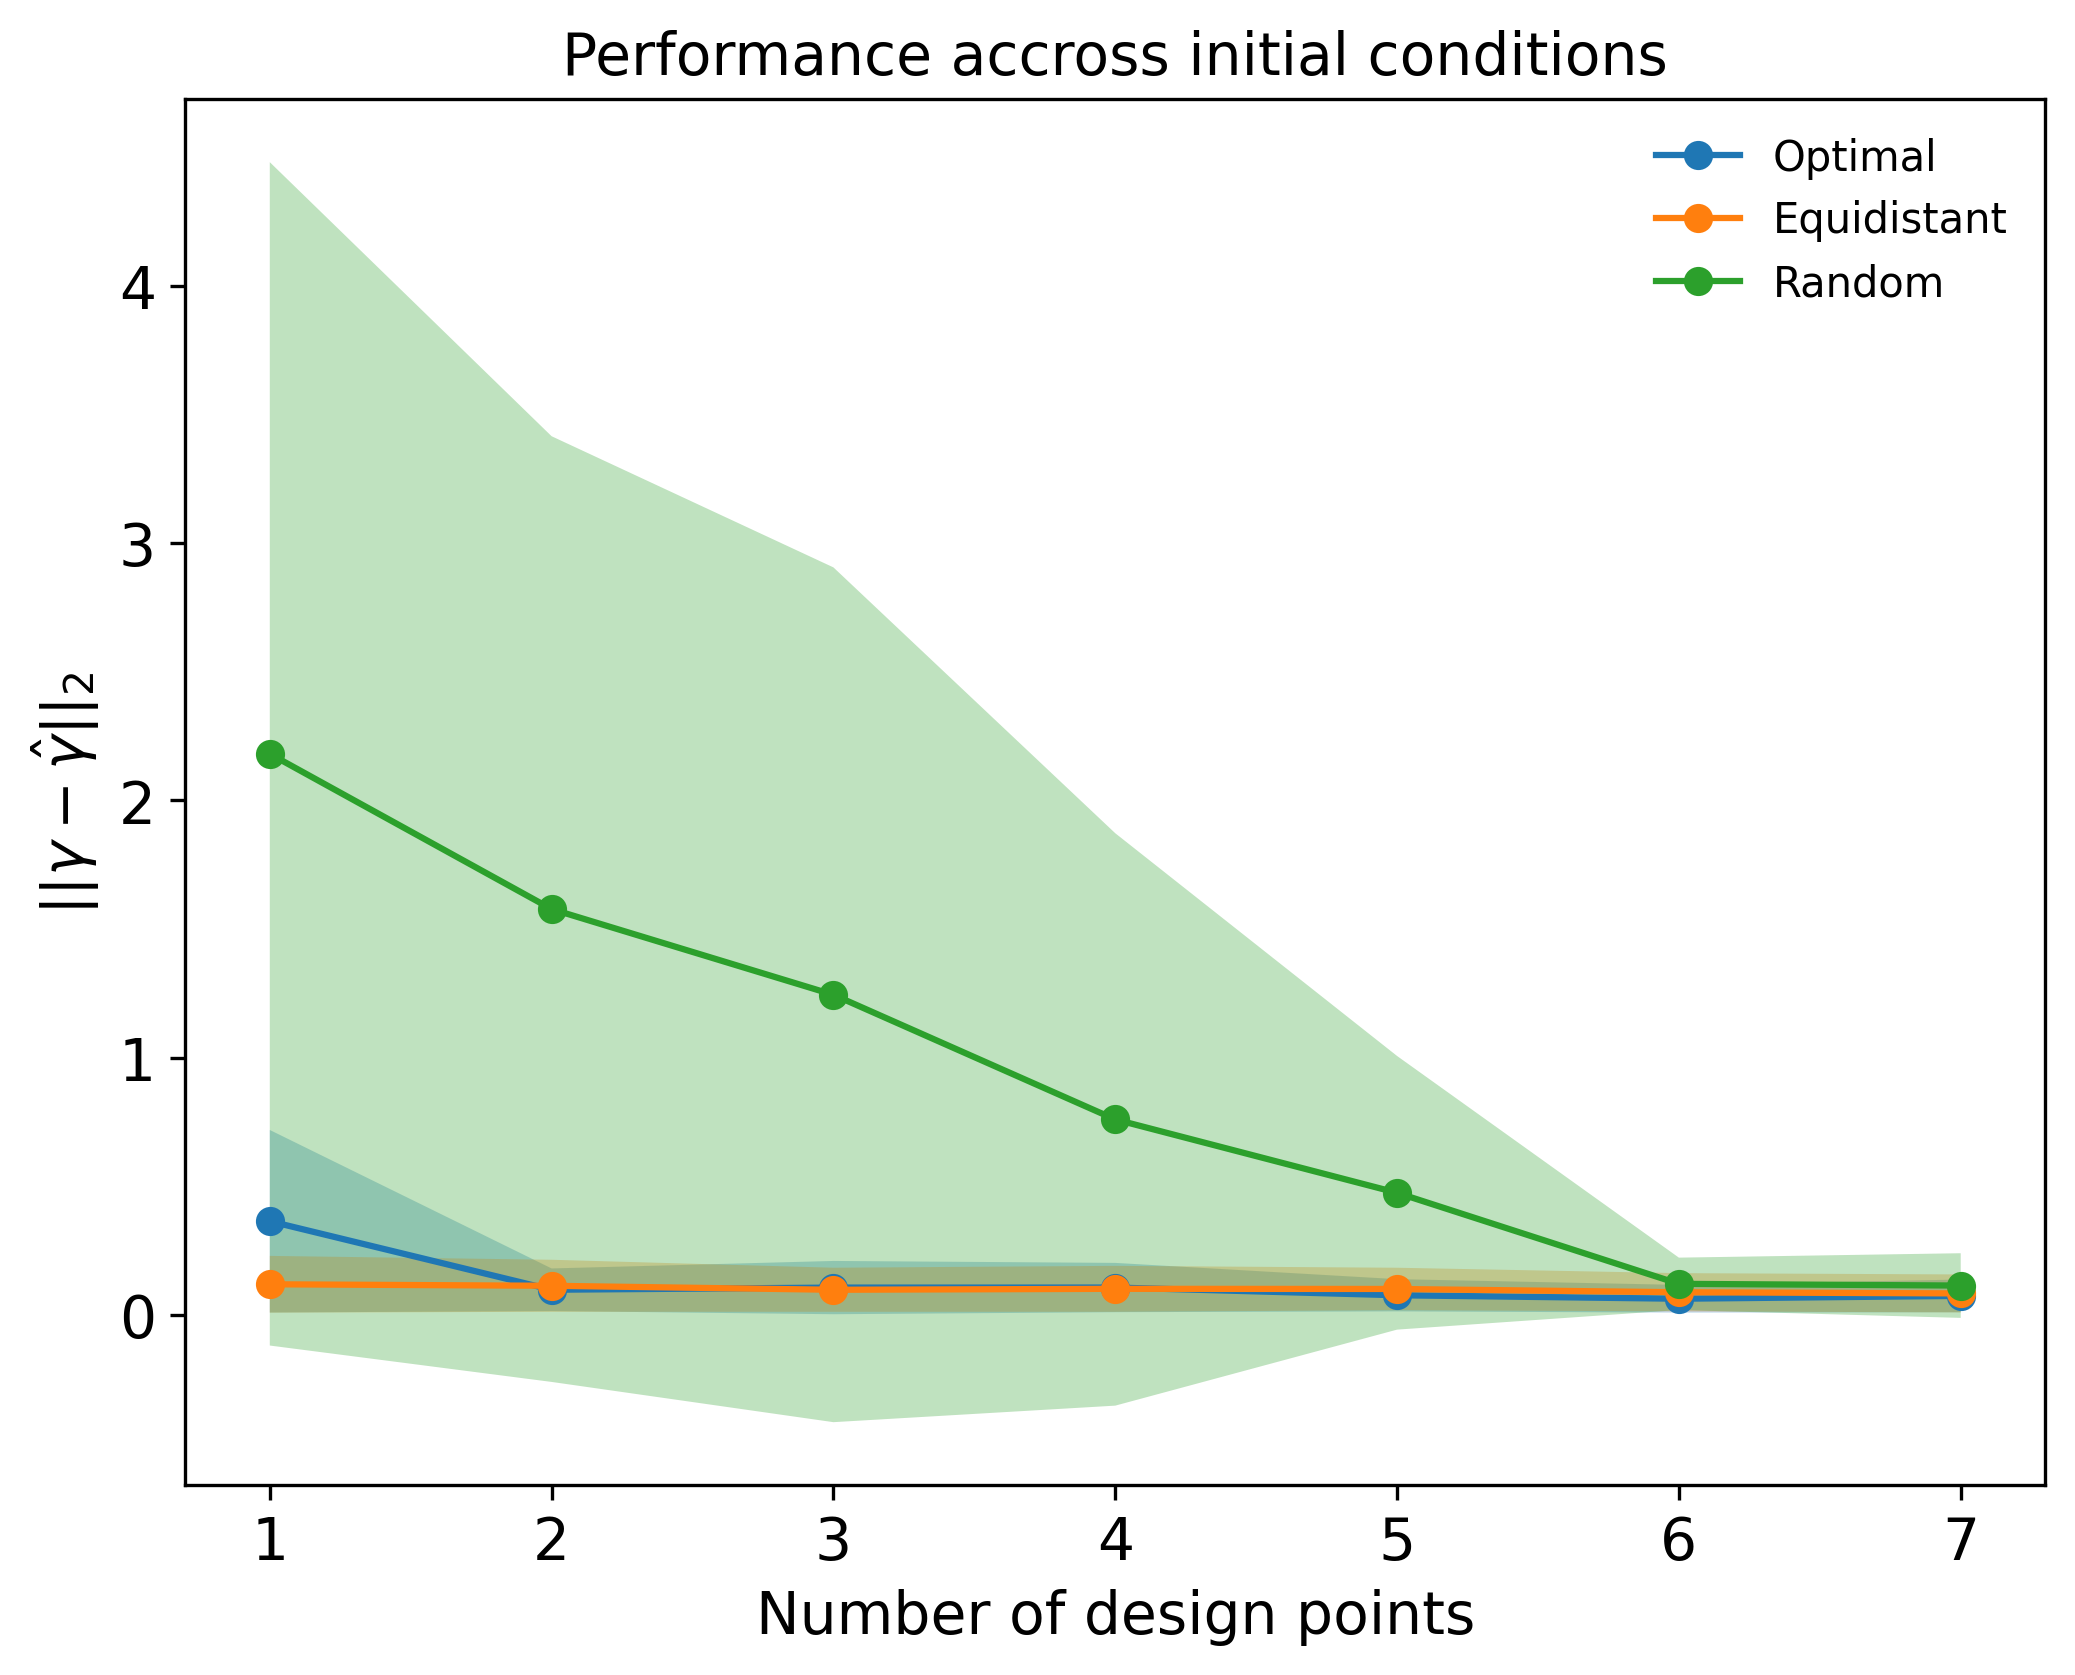

In [1186]:
mu = jnp.mean(jnp.linalg.norm(ED_MLEs_ic - true_param, axis=-1), axis=[1,2])
NOED_mu = jnp.mean(jnp.linalg.norm(NOED_MLEs_ic - true_param, axis=-1), axis=[1, 2])
random_mu = jnp.mean(jnp.linalg.norm(random_NOED_MLEs_ic - true_param, axis=-1), axis=[1,2])

var = jnp.std(jnp.linalg.norm(ED_MLEs_ic - true_param, axis=-1), axis=[1,2])#/jnp.sqrt(ED_MLEs_ic.shape[1])
NOED_var = jnp.std(jnp.linalg.norm(NOED_MLEs_ic - true_param, axis=-1), axis=[1,2])#/jnp.sqrt(NOED_MLEs_ic.shape[1])
random_var = jnp.std(jnp.linalg.norm(random_NOED_MLEs_ic - true_param, axis=-1), axis=[1,2])#/jnp.sqrt(random_NOED_MLEs_ic.shape[1])
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(range(1,len(mu)+1), mu, '-o', label = "Optimal")
# plt.plot(range(1,len(NOED_mu)+1), mu + var, '--', color = "blue")
# plt.plot(range(1,len(NOED_mu)+1), mu - var, '--', color = "blue")
plt.fill_between(range(1,len(mu)+1), mu - var, mu + var, alpha=0.3)
plt.plot(range(1,len(NOED_mu)+1), NOED_mu, '-o', label = "Equidistant")
plt.fill_between(range(1,len(NOED_mu)+1), NOED_mu - NOED_var, NOED_mu + NOED_var, alpha=0.3)
plt.plot(range(1,len(random_mu)+1), random_mu, '-o', label = "Random")
plt.fill_between(range(1,len(random_mu)+1), random_mu - random_var, random_mu + random_var, alpha=0.3)
plt.xlabel('Number of design points', fontsize = 14)
plt.ylabel(r'$||\gamma - \hat{\gamma}||_2$', fontsize = 14)
plt.title('Performance accross initial conditions', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(frameon = False)

plt.show()

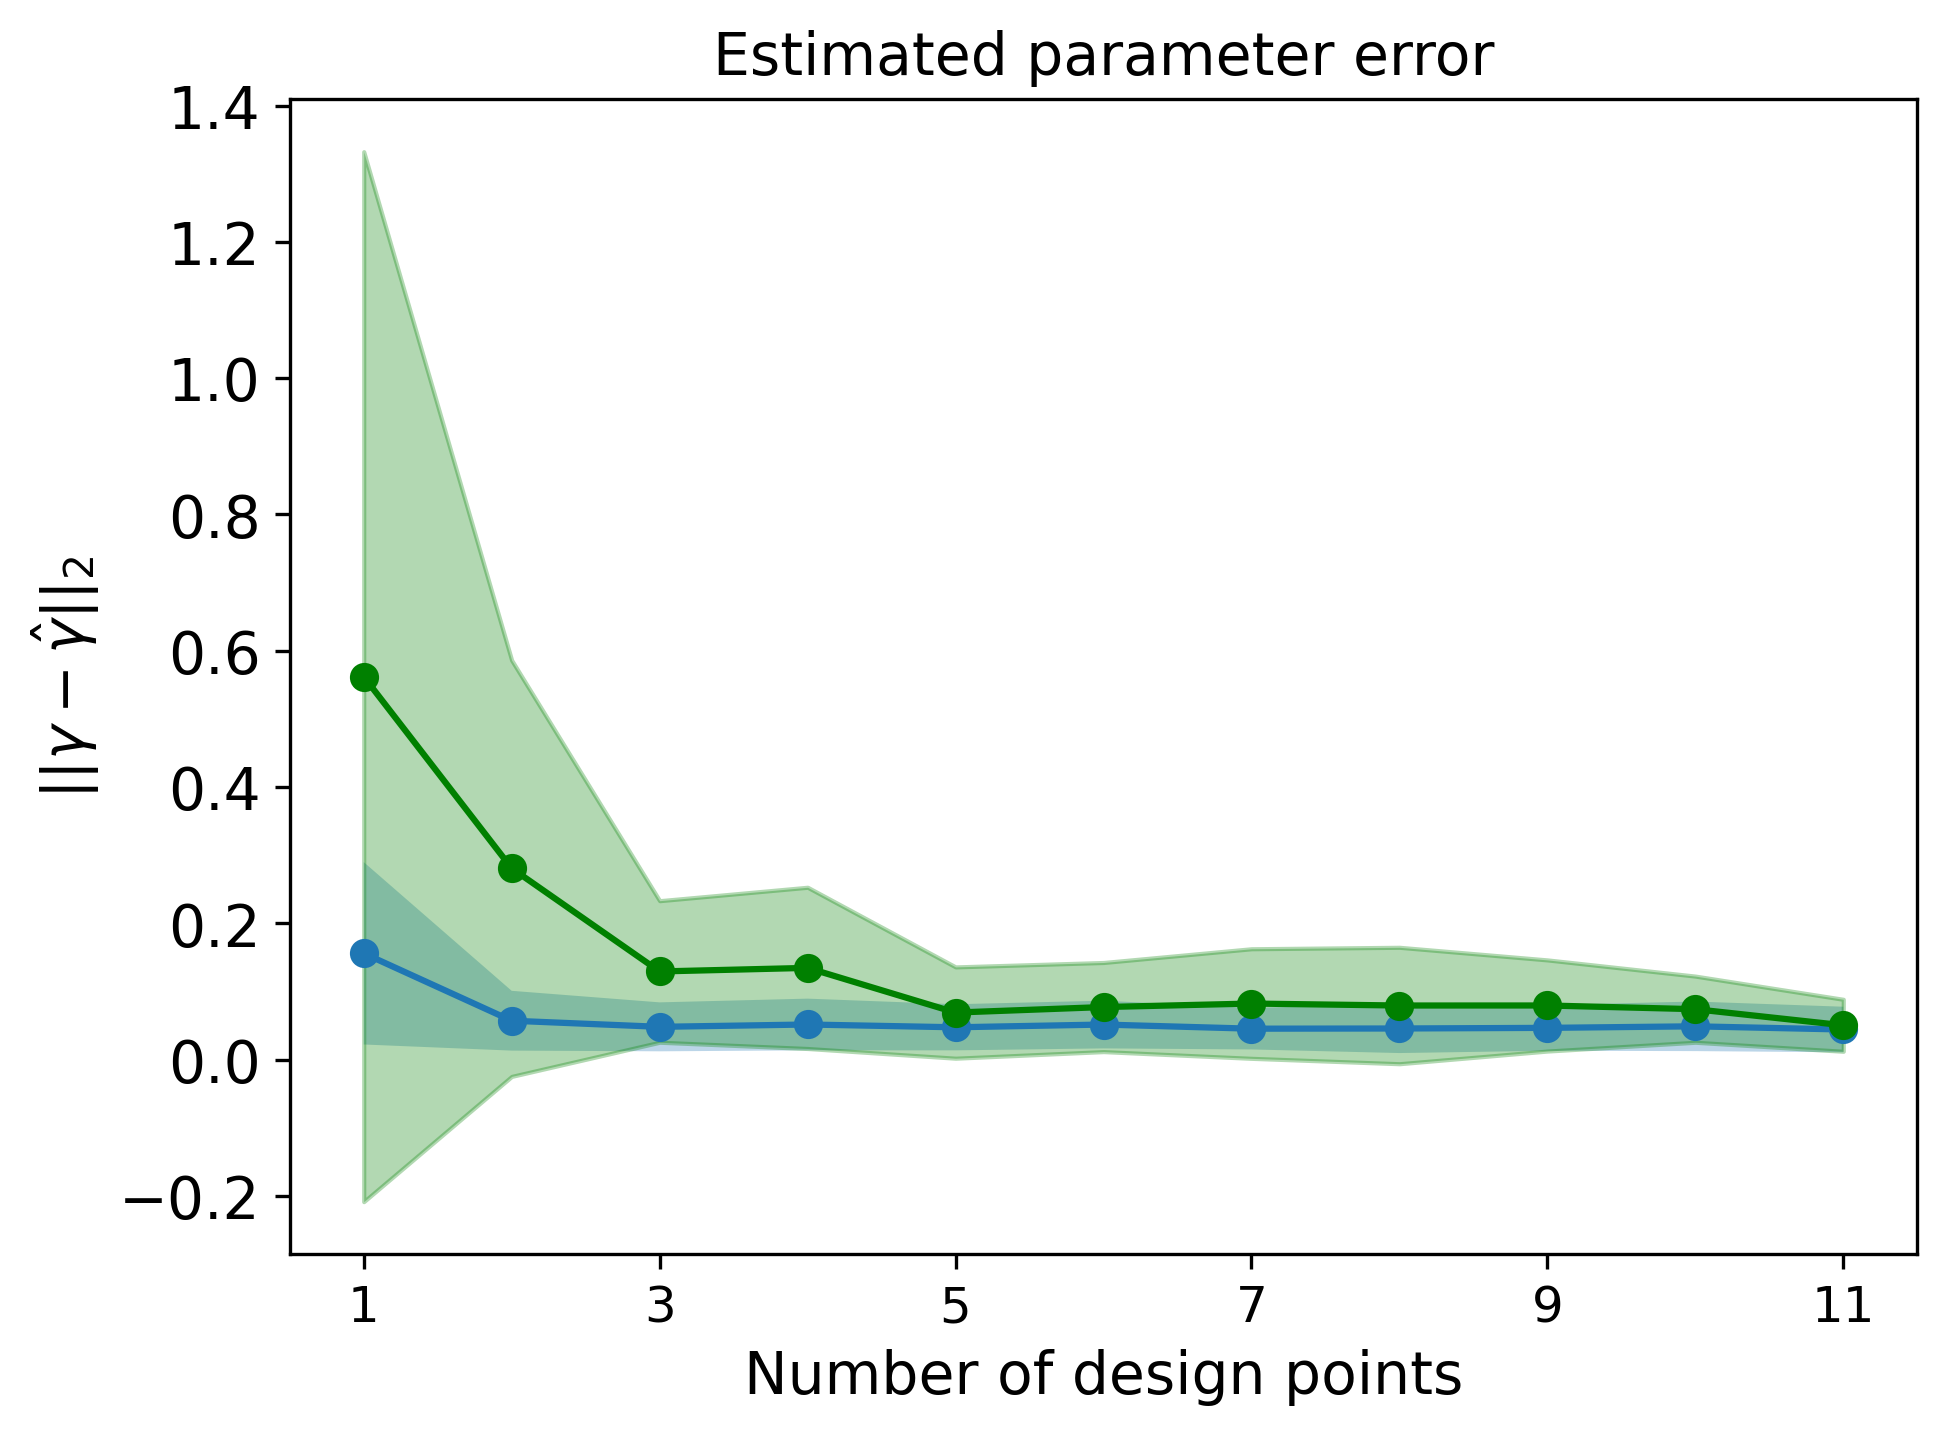

In [1226]:
mu = jnp.mean(jnp.linalg.norm(ED_MLEs_ic - true_param, axis=-1), axis=[1])    
NOED_mu = jnp.mean(jnp.linalg.norm(NOED_MLEs_ic - true_param, axis=-1), axis=[1])
random_mu = jnp.mean(jnp.linalg.norm(random_NOED_MLEs_ic - true_param, axis=-1), axis=[1])
random_var = jnp.std(jnp.linalg.norm(random_NOED_MLEs_ic - true_param, axis=-1), axis=[1])#/jnp.sqrt(random_NOED_MLEs_ic.shape[1])
var = jnp.std(jnp.linalg.norm(ED_MLEs_ic - true_param, axis=-1), axis=[1])#/jnp.sqrt(ED_MLEs_ic.shape[1])
# NOED_var = jnp.std(jnp.linalg.norm(NOED_MLEs_ic - true_param, axis=-1), axis=[1])#/jnp.sqrt(NOED_MLEs_ic.shape[1])
qplot(mu, var, random_mu, random_var, y_label=r'$||\gamma - \hat{\gamma}||_2$', title='Estimated parameter error', dpi=300)